In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!wandb login 9676e3cc95066e4865586082971f2653245f09b4

Appending key for api.wandb.ai to your netrc file: /Users/guydavidson/.netrc
Successfully logged in to Weights & Biases!


In [3]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.special import factorial

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import path as mpath

import pickle
import tabulate
import wandb
from collections import namedtuple

import meta_learning_data_analysis as analysis
import meta_learning_analysis_plots as plots

In [5]:
cache = analysis.refresh_cache()
print(cache.keys())

dict_keys(['six_replications_analyses', 'control_analyses', 'query_mod_replications', 'six_replications_updated_analyses', 'updated_control_analyses', 'query_mod_updated_analyses', 'forgetting_curves_raw_data', 'preliminary_maml_analyses', 'baseline_maml_comparison_analyses', 'maml_analyses', 'maml_alpha_0_analyses', 'maml_meta_test_analyses', 'balanced_batches_analyses'])


In [13]:
if 'six_replications_analyses' in cache:
    six_replications_analyses = cache['six_replications_analyses']

else:
    six_replications_by_dimension_runs = analysis.load_runs(60)
    print('Loaded runs')

    six_reps_dict = {dimension_name:analysis.process_multiple_runs(run_set) 
                     for run_set, dimension_name 
                     in zip(six_replications_by_dimension_runs, analysis.CONDITION_ANALYSES_FIELDS)}
    six_replications_analyses = analysis.ConditionAnalysesSet(**six_reps_dict)

    cache = analysis.refresh_cache(dict(six_replications_analyses=six_replications_analyses))


Loaded runs
iazzikhz
n176tmnt
bd1er97c
sh91ft38
cv6jgwe2
4uv1m2ni
kyjvszri
ozdege38
uji9e0uq
9dj057of
po553kn9 10
cm0kvc1h
bipyo5ni
zca6viso
o7ckcea8
gy0rsrl9
hlteyexu
scwo9ir5
f746u154
x6e1325w
esagb9az 20
wflmzsj9
pdiwqhe9
pmh2b2dl
l1ls8wlh
929pns39
cyar3naq
g7zgj0ho
2bq23h4p
p7dscj8g
l9jsv6mu 30
bsf5sgwl
lsh3kych
npkh2ptg
p8c47p82
5a5xt5cq
nlawo7uq
guvkagt2
5yz7nn6q
z5btkgwv
ihs3ictb 40
c10hf0e4
e32z1707
cw94rn48
mw9kn9r8
92qm7nfu
h9l6w2t0
t77g49gu
xc2bzcru
dvbhw4ej
z2uve5tk 50
rtf38cqc
p6eontzo
nm4br60p
00l0hnmm
92m46h2x
7q2jydff
dp7jxdgd
ytrtatsf
ngg56zgg
Removing extraneous nans
Max first nan index: 286
Examples to criterion examples
Log examples to criterion log_examples
New task accuracy accuracies
New task accuracy delta accuracy_drops
First task accuracy by epoch first_task_accuracies
New task accuracy by epoch new_task_accuracies
inc9upo4


/Users/guydavidson/projects/deep-learning-projects/notebooks/meta_learning_data_analysis.py:327: RuntimeWarning: Mean of empty slice
  accuracy_counts[accuracy_counts == 0] = 1
/Users/guydavidson/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


2lyja5rn
bfyp0q54
bwehks64
2hsmcqm9
61lyccex
ekbyzw3z
6iz98q63
fbnzzvcw
04isdn57
6usz7a5c 10
8ijcb01x
icbhcxu5
nve6wp9h
nj132gkx
d05zagra
hrwzvfyx
8whwjn0n
57fnvsut
7ojkg2yz
jqu72lzb 20
jemwiheo
kj2jnhp9
vgogw4dh
wq26nje7
d9gthrwt
3odmrzgf
6m3qinkl
rmse53fx
0d52ihmn
p1hwiacw 30
gyemcnqg
qpd5lyuy
rj82zno0
ga6wrwne
u7m3bwiq
3b03r129
sct18fkm
b6u42fx9
obfv4h8x
tin9upha 40
1whayczs
3ofrdt2b
ob0wi3xt
g7ju5ic3
0fqw8yzi
p33obo7r
g2x0mrza
rsgoe3ch
k45e3wi1
98gtdio2 50
yd3gfi84
hpsewqnh
q3awh0ki
f3ffl71c
cuelp6d0
l1wiai0a
7892475r
wxghgr8r
di1wbvgj
Removing extraneous nans
Max first nan index: 33
Examples to criterion examples
Log examples to criterion log_examples
New task accuracy accuracies
New task accuracy delta accuracy_drops
First task accuracy by epoch first_task_accuracies
New task accuracy by epoch new_task_accuracies
pdpvsu1c
lqd99cai
q2rwmgrj
7zkojtn6
ulj5vzwu
3svz4swy
dtrw4owt
qgrqka40
a572fsr8
4fp3n0w8
62tq0mbw 10
6fmtx2m7
p5lnuz37
elebn6iu
3n2r0155
j35kljar
1b7vcbc7
zyy9u6pm
vofh

CommError: HTTPSConnectionPool(host='api.wandb.ai', port=443): Read timed out. (read timeout=10)

In [7]:
# if 'six_replications_updated_analyses' in cache:
#     six_replications_updated_analyses = cache['six_replications_updated_analyses']

# else:
six_replications_by_dimension_runs = analysis.load_runs(60)
print('Loaded runs')

# note: the equal accuracy field will come in as accuracy_drops
updated_six_reps_dict = {}
start_index = 0
for run_set, dimension_name in zip(six_replications_by_dimension_runs[start_index:], 
                                   analysis.CONDITION_ANALYSES_FIELDS[start_index:]):
    updated_six_reps_dict[dimension_name] = analysis.process_multiple_runs(
        run_set, parse_func=analysis.parse_run_results_with_new_task_accuracy_and_equal_size) 

# combined_analysis = analysis.process_multiple_runs(
#     six_replications_by_dimension_runs[3], 
#     parse_func=analysis.parse_run_results_with_new_task_accuracy_and_equal_size)

six_replications_updated_analyses = analysis.ConditionAnalysesSet(**updated_six_reps_dict)

cache = analysis.refresh_cache(dict(six_replications_updated_analyses=six_replications_updated_analyses))


Loaded runs
iazzikhz
n176tmnt
bd1er97c
sh91ft38
cv6jgwe2
4uv1m2ni
kyjvszri
ozdege38
uji9e0uq
9dj057of
po553kn9 10
cm0kvc1h
bipyo5ni
zca6viso
o7ckcea8
gy0rsrl9
hlteyexu
scwo9ir5
f746u154
x6e1325w
esagb9az 20
wflmzsj9
pdiwqhe9
pmh2b2dl
l1ls8wlh
929pns39
cyar3naq
g7zgj0ho
2bq23h4p
p7dscj8g
l9jsv6mu 30
bsf5sgwl
lsh3kych
npkh2ptg
p8c47p82
5a5xt5cq
nlawo7uq
guvkagt2
5yz7nn6q
z5btkgwv
ihs3ictb 40
c10hf0e4
e32z1707
cw94rn48
mw9kn9r8
92qm7nfu
h9l6w2t0
t77g49gu
xc2bzcru
dvbhw4ej
z2uve5tk 50
rtf38cqc
p6eontzo
nm4br60p
00l0hnmm
92m46h2x
7q2jydff
dp7jxdgd
ytrtatsf
ngg56zgg
Removing extraneous nans
Max first nan index: 286
Examples to criterion examples
Log examples to criterion log_examples
New task accuracy accuracies
New task accuracy delta accuracy_drops
First task accuracy by epoch first_task_accuracies
New task accuracy by epoch new_task_accuracies
inc9upo4


/Users/guydavidson/projects/deep-learning-projects/notebooks/meta_learning_data_analysis.py:327: RuntimeWarning: Mean of empty slice
  mean=np.nanmean(result_set, axis=0),
/Users/guydavidson/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


2lyja5rn
bfyp0q54
bwehks64
2hsmcqm9
61lyccex
ekbyzw3z
6iz98q63
fbnzzvcw
04isdn57
6usz7a5c 10
8ijcb01x
icbhcxu5
nve6wp9h
nj132gkx
d05zagra
hrwzvfyx
8whwjn0n
57fnvsut
7ojkg2yz
jqu72lzb 20
jemwiheo
kj2jnhp9
vgogw4dh
wq26nje7
d9gthrwt
3odmrzgf
6m3qinkl
rmse53fx
0d52ihmn
p1hwiacw 30
gyemcnqg
qpd5lyuy
rj82zno0
ga6wrwne
u7m3bwiq
3b03r129
sct18fkm
b6u42fx9
obfv4h8x
tin9upha 40
1whayczs
3ofrdt2b
ob0wi3xt
g7ju5ic3
0fqw8yzi
p33obo7r
g2x0mrza
rsgoe3ch
k45e3wi1
98gtdio2 50
yd3gfi84
hpsewqnh
q3awh0ki
f3ffl71c
cuelp6d0
l1wiai0a
7892475r
wxghgr8r
di1wbvgj
Removing extraneous nans
Max first nan index: 33
Examples to criterion examples
Log examples to criterion log_examples
New task accuracy accuracies
New task accuracy delta accuracy_drops
First task accuracy by epoch first_task_accuracies
New task accuracy by epoch new_task_accuracies
pdpvsu1c
lqd99cai
q2rwmgrj
7zkojtn6
ulj5vzwu
3svz4swy
dtrw4owt
qgrqka40
a572fsr8
4fp3n0w8
62tq0mbw 10
6fmtx2m7
p5lnuz37
elebn6iu
3n2r0155
j35kljar
1b7vcbc7
zyy9u6pm
vofh

In [7]:
if 'control_analyses' in cache:
    control_analyses = cache['control_analyses']

else:
    control_runs = analysis.load_runs(150, 'meta-learning-scaling/sequential-benchmark-control', False)
    print(f'Loaded runs')
    control_analyses = analysis.ConditionAnalysesSet(combined=analysis.process_multiple_runs(control_runs.combined))

    cache = analysis.refresh_cache(dict(control_analyses=control_analyses))

Loaded runs
0vkgc296
ruclkblv
skpuv3jm
55w4kq1c
hj69gvnl
i71tgitd
ogriqj3s
ubab36c4
21so6ynt
0a26izvb
bxi6gj7m 10
z0xif2oj
wvxtplft
bo2qik2e
t7cy0wa3
scxhxglp
7w5792n1
otcm0ri5
7zrgahs2
jpbe5ivk
4z4ykcgq 20
kfdtxpx1
bvp2qgxk
cuew9099
wan7xtv0
3gzl1jrb
0hjg3uvl
5drqo02j
llrg4t6f
45x9mqw1
42dxanl0 30
186p9j6f
xqou4i1e
035vglcm
1r8kq8yd
km7l2hku
gqto71v8
a56x2sat
4s76sfa0
awg6x725
hrr1wgpy 40
eyw0bm2k
h3zo8cyo
0xe9r85t
8eoigrw2
r8rk1a8w
o31fkiax
tjl7c5or
u38g4xxc
6c28bmxd
6z8616lt 50
ozd0f1ze
zlctvz3f
f93sf8vr
wxiz6c2w
5ipsta5z
gwpt7sgo
ys20cmpg
8le5zpsw
o182vzh4
ub9iqc1r 60
0nc0xx4k
vbqzfttm
gwis4mk4
5gejk6vk
naq7ejmu
gsof1atd
3m2gfy39
klhqwzt1
j72pfznp
d8u98w3n 70
2dry6eit
3td0uh8e
u1ek4jw0
b12eie96
ntv44cf5
s0sj7sp9
e5o5ret7
donv27pr
rpb8foa9
njnm6z42 80
uialxy4i
9eht0bc3
tdph2l5s
m0uv0ik1
5b6frlgv
471lyw5u
49rcvj8l
eu8zvx4j
3v2qpnqv
Removing extraneous nans
Max first nan index: 178
Examples to criterion examples
Log examples to criterion log_examples
New task accuracy accuracies
New t

/Users/guydavidson/projects/deep-learning-projects/notebooks/meta_learning_data_analysis.py:261: RuntimeWarning: Mean of empty slice
  ANALYSIS_SET_FIELDS):
/Users/guydavidson/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [5]:
# if 'six_replications_updated_analyses' in cache:
#     six_replications_updated_analyses = cache['six_replications_updated_analyses']

# else:
control_runs = analysis.load_runs(150, 'meta-learning-scaling/sequential-benchmark-control', False)
print('Loaded runs')

updated_control_analyses = analysis.ConditionAnalysesSet(
    combined=analysis.process_multiple_runs(control_runs.combined, 
                                            parse_func=analysis.parse_run_results_with_new_task_accuracy_and_equal_size))


cache = analysis.refresh_cache(dict(updated_control_analyses=updated_control_analyses))


Loaded runs
0vkgc296
ruclkblv
skpuv3jm
55w4kq1c
hj69gvnl
i71tgitd
ogriqj3s
ubab36c4
21so6ynt
0a26izvb
bxi6gj7m 10
z0xif2oj
wvxtplft
bo2qik2e
t7cy0wa3
scxhxglp
7w5792n1
otcm0ri5
7zrgahs2
jpbe5ivk
kfdtxpx1 20
4z4ykcgq
bvp2qgxk
cuew9099
wan7xtv0
3gzl1jrb
0hjg3uvl
5drqo02j
llrg4t6f
45x9mqw1
42dxanl0 30
186p9j6f
xqou4i1e
035vglcm
1r8kq8yd
km7l2hku
gqto71v8
a56x2sat
4s76sfa0
awg6x725
hrr1wgpy 40
eyw0bm2k
h3zo8cyo
0xe9r85t
8eoigrw2
r8rk1a8w
o31fkiax
tjl7c5or
u38g4xxc
6c28bmxd
6z8616lt 50
ozd0f1ze
zlctvz3f
f93sf8vr
wxiz6c2w
5ipsta5z
gwpt7sgo
ys20cmpg
8le5zpsw
o182vzh4
ub9iqc1r 60
0nc0xx4k
vbqzfttm
gwis4mk4
5gejk6vk
naq7ejmu
gsof1atd
3m2gfy39
klhqwzt1
j72pfznp
d8u98w3n 70
2dry6eit
3td0uh8e
u1ek4jw0
b12eie96
ntv44cf5
s0sj7sp9
e5o5ret7
donv27pr
rpb8foa9
njnm6z42 80
uialxy4i
9eht0bc3
tdph2l5s
m0uv0ik1
5b6frlgv
471lyw5u
49rcvj8l
eu8zvx4j
3v2qpnqv
Removing extraneous nans
Max first nan index: 178
Examples to criterion examples
Log examples to criterion log_examples
New task accuracy accuracies
New t

/Users/guydavidson/projects/deep-learning-projects/notebooks/meta_learning_data_analysis.py:327: RuntimeWarning: Mean of empty slice
  mean=np.nanmean(result_set, axis=0),
/Users/guydavidson/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [9]:
cache = analysis.refresh_cache(dict(control_analyses=control_analyses))

# Plot the results

## Plot the number of examples by dimension

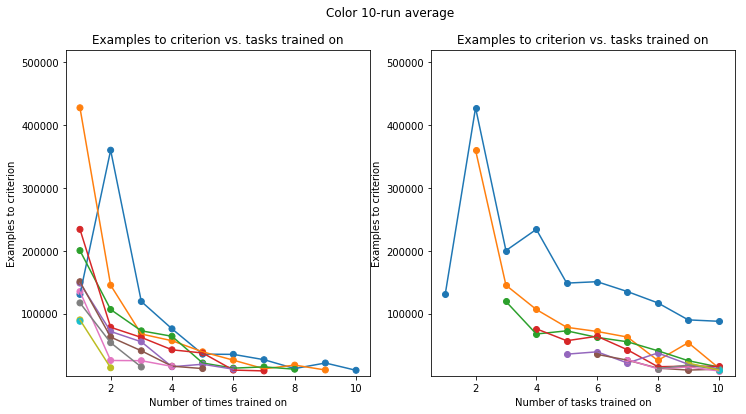

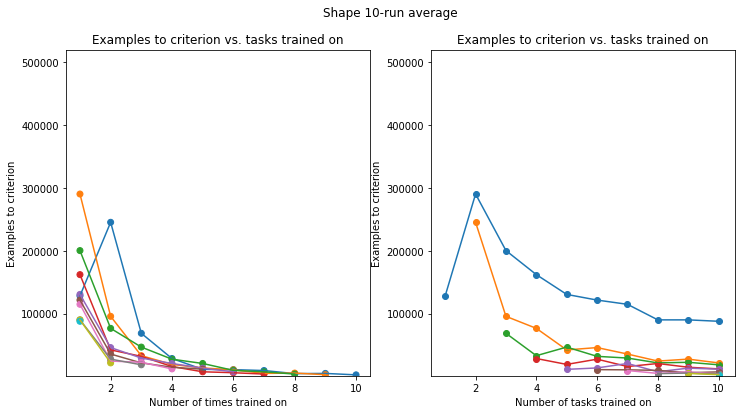

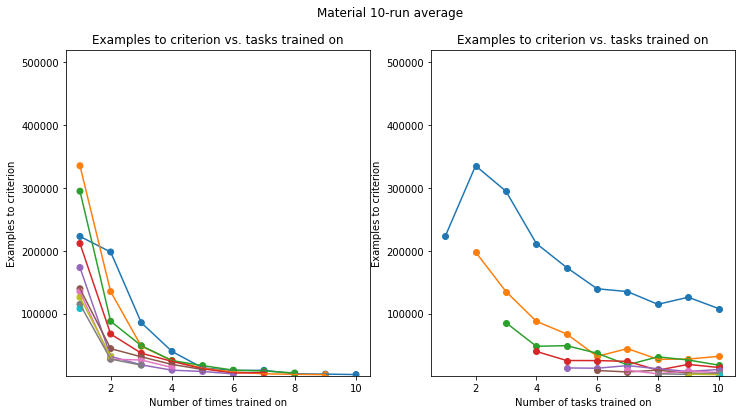

In [98]:
ylim = (1000, 520000)

plots.plot_processed_results(first_replication_analyses.color.examples, 'Color 10-run average', ylim)
plots.plot_processed_results(first_replication_analyses.shape.examples, 'Shape 10-run average', ylim)
plots.plot_processed_results(first_replication_analyses.texture.examples, 'Material 10-run average', ylim)

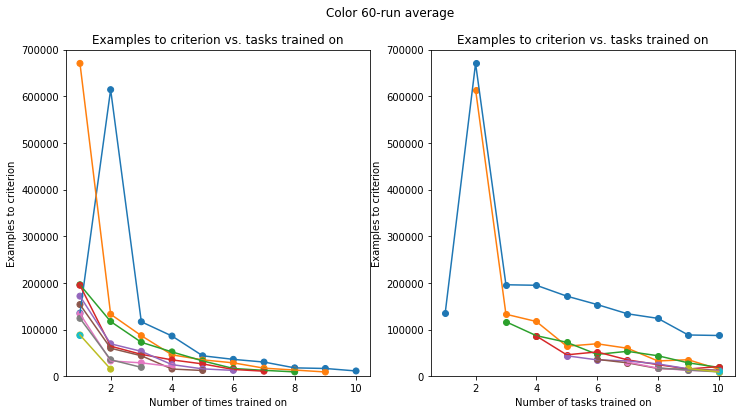

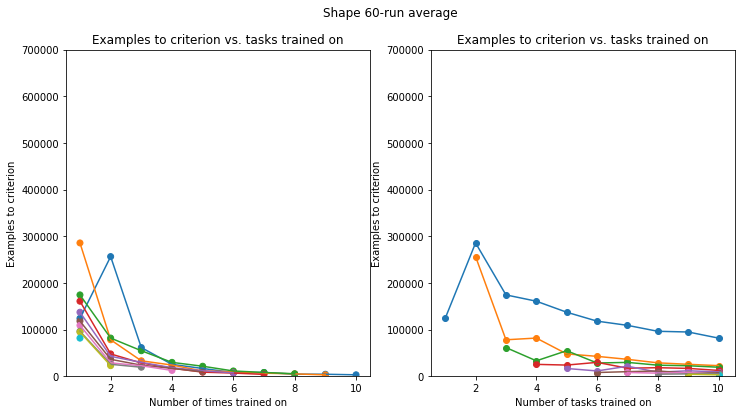

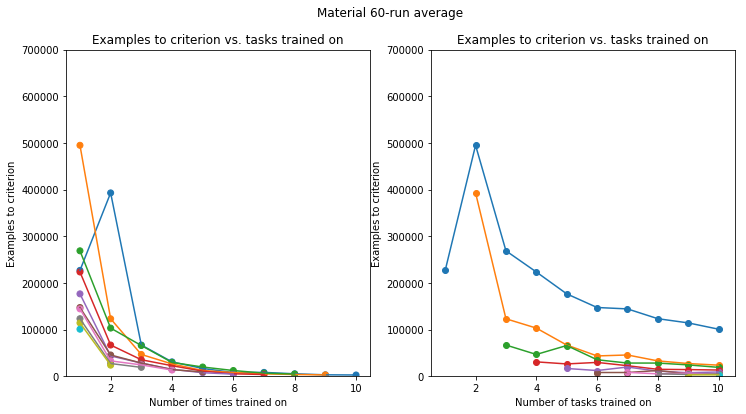

In [99]:
ylim = (1000, 700000)

plots.plot_processed_results(six_replications_analyses.color.examples, 'Color 60-run average', ylim)
plots.plot_processed_results(six_replications_analyses.shape.examples, 'Shape 60-run average', ylim)
plots.plot_processed_results(six_replications_analyses.texture.examples, 'Material 60-run average', ylim)

## Plot the log of the number of examples to criterion, in each dimension, with error bars

## Plot the combined results over all 180 runs

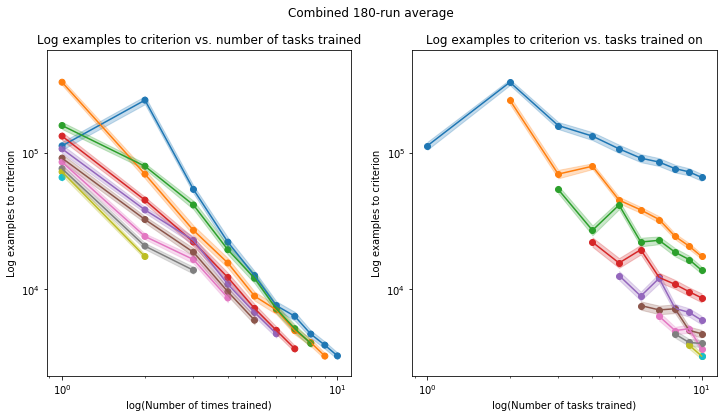

In [126]:
ylim = (7.75, 13.25)

plots.plot_processed_results(six_replications_analyses.combined.log_examples, 'Combined 180-run average', 
                       ylim, log_x=(True, True), log_y=True, sem_n=180, shade_error=True)

## Plot the absolute accuracy after introducing a new task

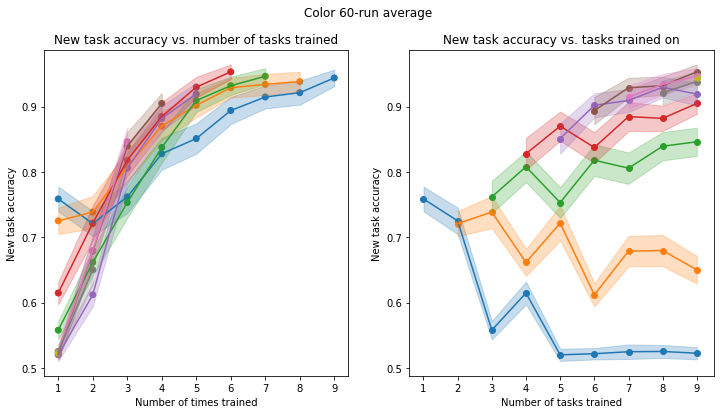

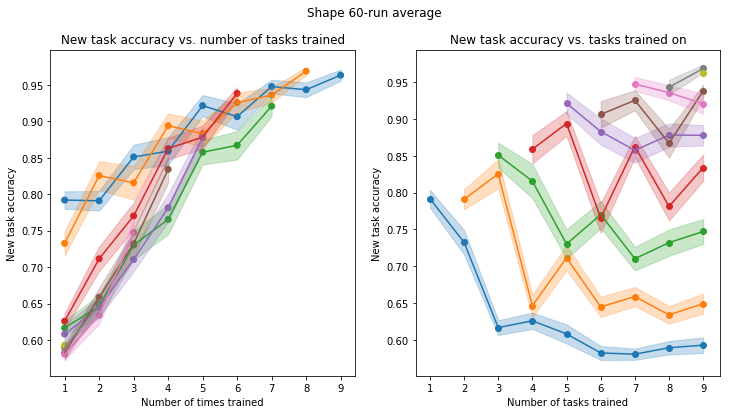

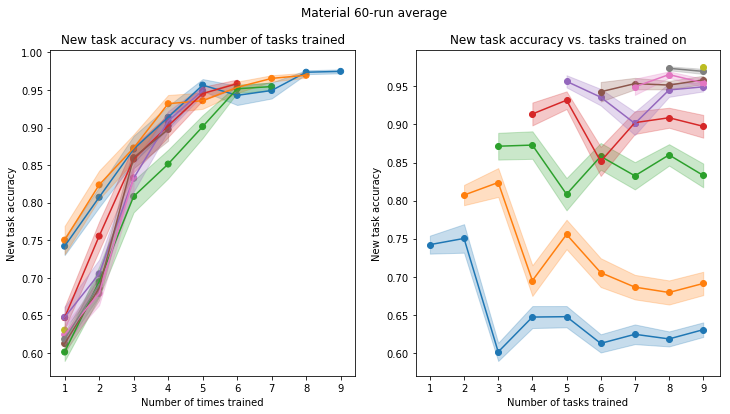

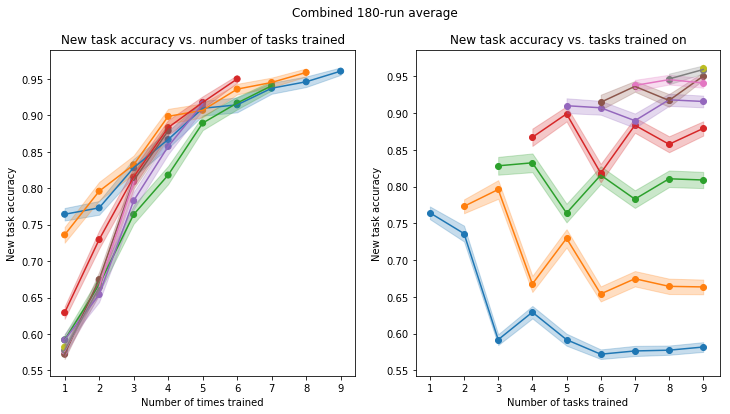

In [128]:
ylim = None

plots.plot_processed_results(six_replications_analyses.color.accuracies, 'Color 60-run average', 
                       ylim, log_x=False, log_y=False, sem_n=60, shade_error=True)
plots.plot_processed_results(six_replications_analyses.shape.accuracies, 'Shape 60-run average', 
                       ylim, log_x=False, log_y=False, sem_n=60, shade_error=True)
plots.plot_processed_results(six_replications_analyses.texture.accuracies, 'Material 60-run average', 
                       ylim, log_x=False, log_y=False, sem_n=60, shade_error=True)
plots.plot_processed_results(six_replications_analyses.combined.accuracies, 'Combined 180-run average', 
                       ylim, log_x=False, log_y=False, sem_n=180, shade_error=True)

## Plot the accuracy drop after introducing a new task

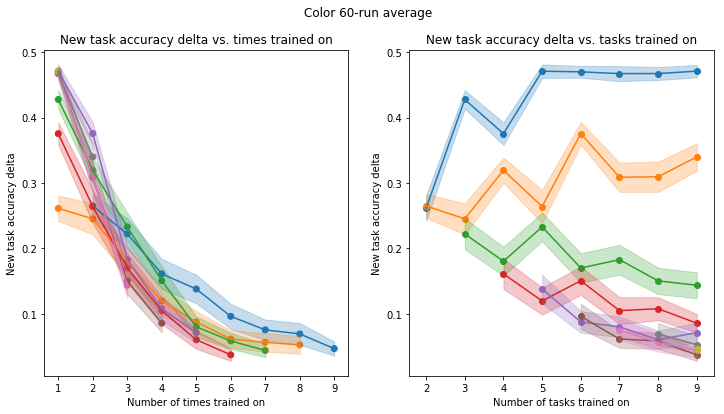

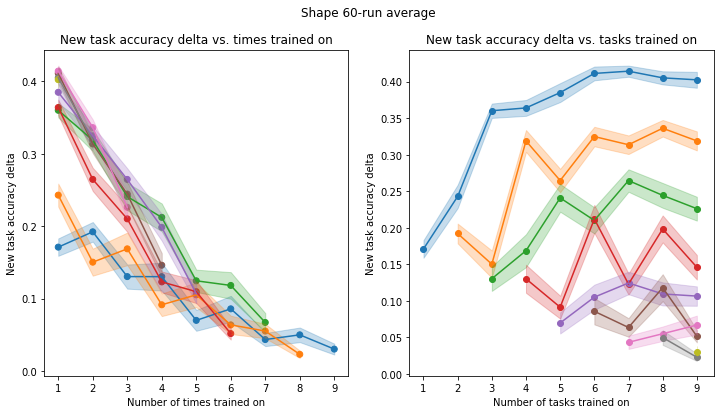

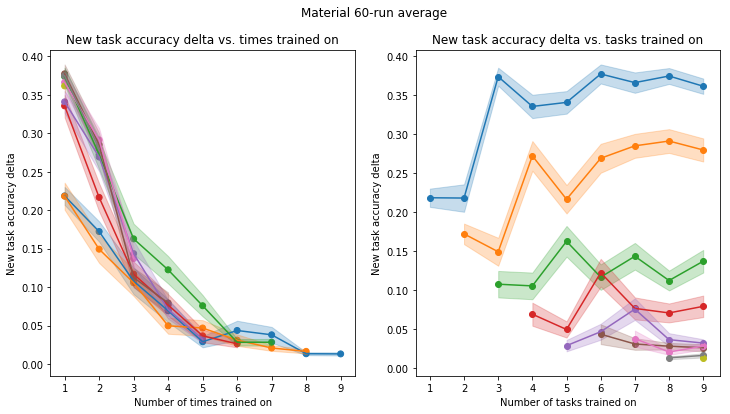

In [38]:
ylim = None

plots.plot_processed_results(six_replications_analyses.color.accuracy_drops, 'Color 60-run average', 
                       ylim, log_x=False, log_y=False, sem_n=60, shade_error=True)
plots.plot_processed_results(six_replications_analyses.shape.accuracy_drops, 'Shape 60-run average', 
                       ylim, log_x=False, log_y=False, sem_n=60, shade_error=True)
plots.plot_processed_results(six_replications_analyses.texture.accuracy_drops, 'Material 60-run average', 
                       ylim, log_x=False, log_y=False, sem_n=60, shade_error=True)

# Load and process the query-modualted runs

In [5]:
if 'query_mod_replications' in cache:
    query_mod_replications = cache['query_mod_replications']

else:
    query_mod_runs = analysis.query_modulated_runs_by_dimension(30)
    query_mod_replications = {}

    ignore_runs = [] # ('at6pkicv', )
    for mod_level in query_mod_runs:
        mod_level_runs = query_mod_runs[mod_level]

        mod_level_dict = {dimension_name: analysis.process_multiple_runs(mod_level_runs[i], ignore_runs=ignore_runs) 
                          for i, dimension_name 
                          in enumerate(analysis.CONDITION_ANALYSES_FIELDS)}

        query_mod_replications[mod_level] = analysis.ConditionAnalysesSet(**mod_level_dict)

    cache = analysis.refresh_cache(dict(query_mod_replications=query_mod_replications))

In [9]:
cache = analysis.refresh_cache(dict(query_mod_updated_analyses=query_mod_replications))

In [8]:
# if 'six_replications_updated_analyses' in cache:
#     six_replications_updated_analyses = cache['six_replications_updated_analyses']

# else:
query_mod_runs = analysis.query_modulated_runs_by_dimension(30)
print('Loaded runs')

# note: the equal accuracy field will come in as accuracy_drops
query_mod_replications = {}
mod_levels = list(query_mod_runs.keys())
start_index = 0

for mod_level in mod_levels[start_index:]:
    print(f'Starting mod level {mod_level}')
    mod_level_runs = query_mod_runs[mod_level]

    mod_level_dict = {dimension_name: analysis.process_multiple_runs(mod_level_runs[i], 
                                                                     parse_func=analysis.parse_run_results_with_new_task_accuracy_and_equal_size) 
                      for i, dimension_name 
                      in enumerate(analysis.CONDITION_ANALYSES_FIELDS)}

    query_mod_replications[mod_level] = analysis.ConditionAnalysesSet(**mod_level_dict)


cache = analysis.refresh_cache(dict(query_mod_updated_analyses=query_mod_replications))


Loaded runs
Starting mod level 1
l7bbtyc8
zdwg50ws
k7qwqusc
7k3ariqg
8wmu4pou
jypgg7fi
opfxj2o2
of2e9k05
e1et2c82
d2c4b33n
5h9z7v0g 10
xhzxdsyo
xo44gbf7
x1r2f0hp
2tu5ds2y
ykzydurb
grubg6dh
ihrb8vra
qnk6dqgc
9cj9bbim
m38ebe9o 20
u1fof68i
i2dtn1jy
njc0zy0i
k72bgvjr
tkj88w3h
29px5u8u
jsgp8dcz
r8xq8fd5
6ckkf5h1
Removing extraneous nans
Max first nan index: 466
Examples to criterion examples
Log examples to criterion log_examples
New task accuracy accuracies
New task accuracy delta accuracy_drops
First task accuracy by epoch first_task_accuracies
New task accuracy by epoch new_task_accuracies
dqlvi64k


/Users/guydavidson/projects/deep-learning-projects/notebooks/meta_learning_data_analysis.py:327: RuntimeWarning: Mean of empty slice
  mean=np.nanmean(result_set, axis=0),
/Users/guydavidson/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


jihaq8t8
cnk9rhhk
njl7g8yg
yfiulr24
nwuiusrp
0b86danp
k78bw8js
y77xn0i9
dvtk4l8l
rr39e6we 10
r2gb1tu1
4ynspda0
bo01uedb
m8us5frd
70fb0l9s
6o9ge17v
dz2zmb6q
ttcmmiij
r3ab2dta
euqs5hf5 20
r0y7gpcp
ryjuvk34
cwi05xmt
fr7ilser
az81ad7o
0kw8lgry
2r3ewg1n
mh8rd939
pu0ldb15
Removing extraneous nans
Max first nan index: 55
Examples to criterion examples
Log examples to criterion log_examples
New task accuracy accuracies
New task accuracy delta accuracy_drops
First task accuracy by epoch first_task_accuracies
New task accuracy by epoch new_task_accuracies
iv2k7ptp
ercyh9sg
cxnsw80g
3z1llv7k
gkcqplo0
kxg842fu
djcqc364
rmrsyag1
5spgccwc
v9uiru6t
23a8xggq 10
tfl4u4ct
f3q5zcaa
ticq4afz
ak7fdwem
hyb5ojj1
vrh9xqqn
2ai5z9mt
mt47qeo9
r8jqfs31
wgiprknu 20
1wau0x5k
uqum16wz
xqg0qc7w
ji7tpra6
bxg9likx
w1resers
fzcrtilw
dxuu9xva
9fluyuwz
Removing extraneous nans
Max first nan index: 206
Examples to criterion examples
Log examples to criterion log_examples
New task accuracy accuracies
New task accuracy delta

NameError: name 'updated_six_reps_dict' is not defined

In [13]:
cache = analysis.refresh_cache(dict(query_mod_replications=query_mod_replications,
                                    control_analyses=control_analyses,
                                    six_replications_analyses=six_replications_analyses))

In [39]:
r = api.run('meta-learning-scaling/maml-sequential-benchmark/hk8dl8zv')
h = r.history(samples=4000)
h[:10]

Test AUC  Test Accuracy  Test Accuracy, Query #1  Test Accuracy, Query #10  \
0  0.997816      99.000000                   0.9976                       NaN   
1  0.712670      71.571429                   0.5084                       NaN   
2  0.725554      72.285714                   0.4720                       NaN   
3  0.696228      69.142857                   0.7396                       NaN   
4  0.678810      68.142857                   0.7864                       NaN   
5  0.694443      68.285714                   0.7066                       NaN   
6  0.676407      67.000000                   0.7120                       NaN   
7  0.681638      67.714286                   0.7104                       NaN   
8  0.696137      68.285714                   0.6882                       NaN   
9  0.686399      67.857143                   0.7260                       NaN   

   Test Accuracy, Query #2  Test Accuracy, Query #3  Test Accuracy, Query #4  \
0                      NaN                      NaN                      NaN   
1                   0.9308                      NaN                      NaN   
2                   0.9792                      NaN                      NaN   
3                   0.6518                      NaN                      NaN   
4                   0.5878                      NaN                      NaN   
5                   0.6684                      NaN                      NaN   
6                   0.6408                      NaN                      NaN   
7                   0.6496                      NaN                      NaN   
8                   0.6914                      NaN                      NaN   
9                   0.6390                      NaN                      NaN   

   Test Accuracy, Query #5  Test Accuracy, Query #6  Test Accuracy, Query #7  \
0                      NaN                      NaN                      NaN   
1                      NaN                      NaN                      NaN   
2                      NaN                      NaN                      NaN   
3                      NaN                      NaN                      NaN   
4                      NaN                      NaN                      NaN   
5                      NaN                      NaN                      NaN   
6                      NaN                      NaN                      NaN   
7                      NaN                      NaN                      NaN   
8                      NaN                      NaN                      NaN   
9                      NaN                      NaN                      NaN   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           
4                        ...                           
5                        ...                           
6                        ...                           
7                        ...                           
8                        ...                           
9                        ...                           

                                  gradients/fc1.bias  \
0  {'_type': 'histogram', 'values': [1, 0, 1, 1, ...   
1  {'_type': 'histogram', 'values': [1, 0, 0, 1, ...   
2  {'_type': 'histogram', 'values': [2, 0, 2, 0, ...   
3                                                NaN   
4  {'_type': 'histogram', 'values': [1, 1, 1, 3, ...   
5  {'bins': [-0.005793747026473284, -0.0053841364...   
6  {'bins': [-5.197450718696928e-07, -5.084506824...   
7  {'_type': 'histogram', 'values': [1, 0, 0, 0, ...   
8  {'_type': 'histogram', 'values': [2, 0, 0, 0, ...   
9  {'_type': 'histogram', 'values': [1, 0, 0, 0, ...   

                                gradients/fc1.weight  \
0  {'bins': [-0.013247717171907425, -0.0128838950...   
1  

In [13]:
# if 'maml_analyses' in cache:
#     maml_analyses = cache['maml_analyses']

# else:
maml_runs = analysis.load_runs(30, 'meta-learning-scaling/maml-sequential-benchmark')
print('Loaded runs')

# ignore_runs = set(['oz996ztv', 'oin8pqu2', 'h09i9xyg', 'umo8x16f', 'pm76ui1s', 
#                    'qnyo08x8', 'hmjtjheq', 'wki7q8cs', 'q8ku840y'])
ignore_runs = set()

maml_analyses_dict = {}
start_index = 0
for run_set, dimension_name in zip(maml_runs[start_index:], 
                                   analysis.CONDITION_ANALYSES_FIELDS[start_index:]):

    maml_analyses_dict[dimension_name] = analysis.process_multiple_runs(
        run_set, parse_func=analysis.parse_run_results_with_new_task_accuracy_and_equal_size,
        ignore_runs=ignore_runs) 

maml_analyses = analysis.ConditionAnalysesSet(**maml_analyses_dict)
cache = analysis.refresh_cache(dict(maml_analyses=maml_analyses))


Loaded runs
7o91063b
vtt9r4v7


CommError: HTTPSConnectionPool(host='api.wandb.ai', port=443): Read timed out. (read timeout=10)

In [18]:
# if 'six_replications_updated_analyses' in cache:
#     six_replications_updated_analyses = cache['six_replications_updated_analyses']

# else:
maml_alpha_0_runs = analysis.load_runs(20, 'meta-learning-scaling/maml-alpha-0')
print('Loaded runs')

raise ValueError('This will not work yeet')

# ignore_runs = set(['ac82mceh', '7kau3ypy', 'g9ujw7gg', 'avmcbnot'])
ignore_runs = set()

maml_alpha_0_analyses_dict = {}
start_index = 0
for run_set, dimension_name in zip(maml_alpha_0_runs[start_index:], 
                                   analysis.CONDITION_ANALYSES_FIELDS[start_index:]):
    
    maml_alpha_0_analyses_dict[dimension_name] = analysis.process_multiple_runs(
        run_set, parse_func=analysis.parse_run_results_with_new_task_accuracy_and_equal_size,
        ignore_runs=ignore_runs) 

maml_alpha_0_analyses = analysis.ConditionAnalysesSet(**maml_alpha_0_analyses_dict)
cache = analysis.refresh_cache(dict(maml_alpha_0_analyses=maml_alpha_0_analyses))


Loaded runs


ValueError: This will not work yeet

In [ ]:
# if 'maml_meta_test_analyses' in cache:
#     maml_meta_test_analyses = cache['maml_meta_test_analyses']

# else:
maml_meta_test_runs = analysis.load_runs(20, 'meta-learning-scaling/maml-meta-test')
print('Loaded runs')

# ignore_runs = set(['u3gk9oio'])
ignore_runs = set()

maml_meta_test_analyses_dict = {}
start_index = 0
for run_set, dimension_name in zip(maml_meta_test_runs[start_index:], 
                                   analysis.CONDITION_ANALYSES_FIELDS[start_index:]):

    maml_meta_test_analyses_dict[dimension_name] = analysis.process_multiple_runs(
        run_set, parse_func=analysis.parse_run_results_with_new_task_accuracy_and_equal_size,
        ignore_runs=ignore_runs) 

maml_meta_test_analyses = analysis.ConditionAnalysesSet(**maml_meta_test_analyses_dict)
cache = analysis.refresh_cache(dict(maml_meta_test_analyses=maml_meta_test_analyses))


In [ ]:
# if 'balanced_batches_analyses' in cache:
#     balanced_batches_analyses = cache['balanced_batches_analyses']

# else:
balanced_batches_runs = analysis.load_runs(30, 'meta-learning-scaling/balanced-batches-sequential-benchmark')
print('Loaded runs')

# ignore_runs = set(['u3gk9oio'])
ignore_runs = set()

balanced_batches_analyses_dict = {}
start_index = 0
for run_set, dimension_name in zip(balanced_batches_runs[start_index:], 
                                   analysis.CONDITION_ANALYSES_FIELDS[start_index:]):

    balanced_batches_analyses_dict[dimension_name] = analysis.process_multiple_runs(
        run_set, parse_func=analysis.parse_run_results_with_new_task_accuracy_and_equal_size,
        ignore_runs=ignore_runs) 

balanced_batches_analyses = analysis.ConditionAnalysesSet(**balanced_batches_analyses_dict)
cache = analysis.refresh_cache(dict(balanced_batches_analyses=balanced_batches_analyses))


In [14]:
maml_comparison_run_ids = [1000, 1001, 2000, 2001, 2002, 
                           2003, 2004, 2005, 2006, 2007, 
                           2008, 2009, 3000, 3001, 3002, 
                           3003, 3004, 3005, 3006, 3007, 3008]

maml_comparison_runs = analysis.load_runs(10, split_runs_by_dimension=False, valid_run_ids=set(maml_comparison_run_ids))
print('Loaded runs')

baseline_maml_comparison_analyses = analysis.ConditionAnalysesSet(
    combined=analysis.process_multiple_runs(maml_comparison_runs.combined, 
                                            parse_func=analysis.parse_run_results_with_new_task_accuracy_and_equal_size,))


cache = analysis.refresh_cache(dict(baseline_maml_comparison_analyses=baseline_maml_comparison_analyses))



Loaded runs
qc0bktdx
s9cbkrab
g7ju5ic3
69zbd59u
p33obo7r
rsgoe3ch
fipd6tt3
98gtdio2
erqudkxn
hpsewqnh
f3ffl71c 10
t5yxd2pf
l1wiai0a
u52be4eo
dp7jxdgd
7892475r
l0a2smgl
wxghgr8r
9wahl53t
di1wbvgj
ngg56zgg 20
Removing extraneous nans
Max first nan index: 58
Examples to criterion examples
Log examples to criterion log_examples
New task accuracy accuracies
New task accuracy delta accuracy_drops
First task accuracy by epoch first_task_accuracies
New task accuracy by epoch new_task_accuracies


/Users/guydavidson/projects/deep-learning-projects/notebooks/meta_learning_data_analysis.py:386: RuntimeWarning: Mean of empty slice
  mean=np.nanmean(result_set, axis=0),
/Users/guydavidson/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [15]:
cache.keys()

dict_keys(['six_replications_analyses', 'control_analyses', 'query_mod_replications', 'six_replications_updated_analyses', 'updated_control_analyses', 'query_mod_updated_analyses', 'forgetting_curves_raw_data', 'preliminary_maml_analyses', 'baseline_maml_comparison_analyses'])

## Plot the number of times trained on for every query modulation level

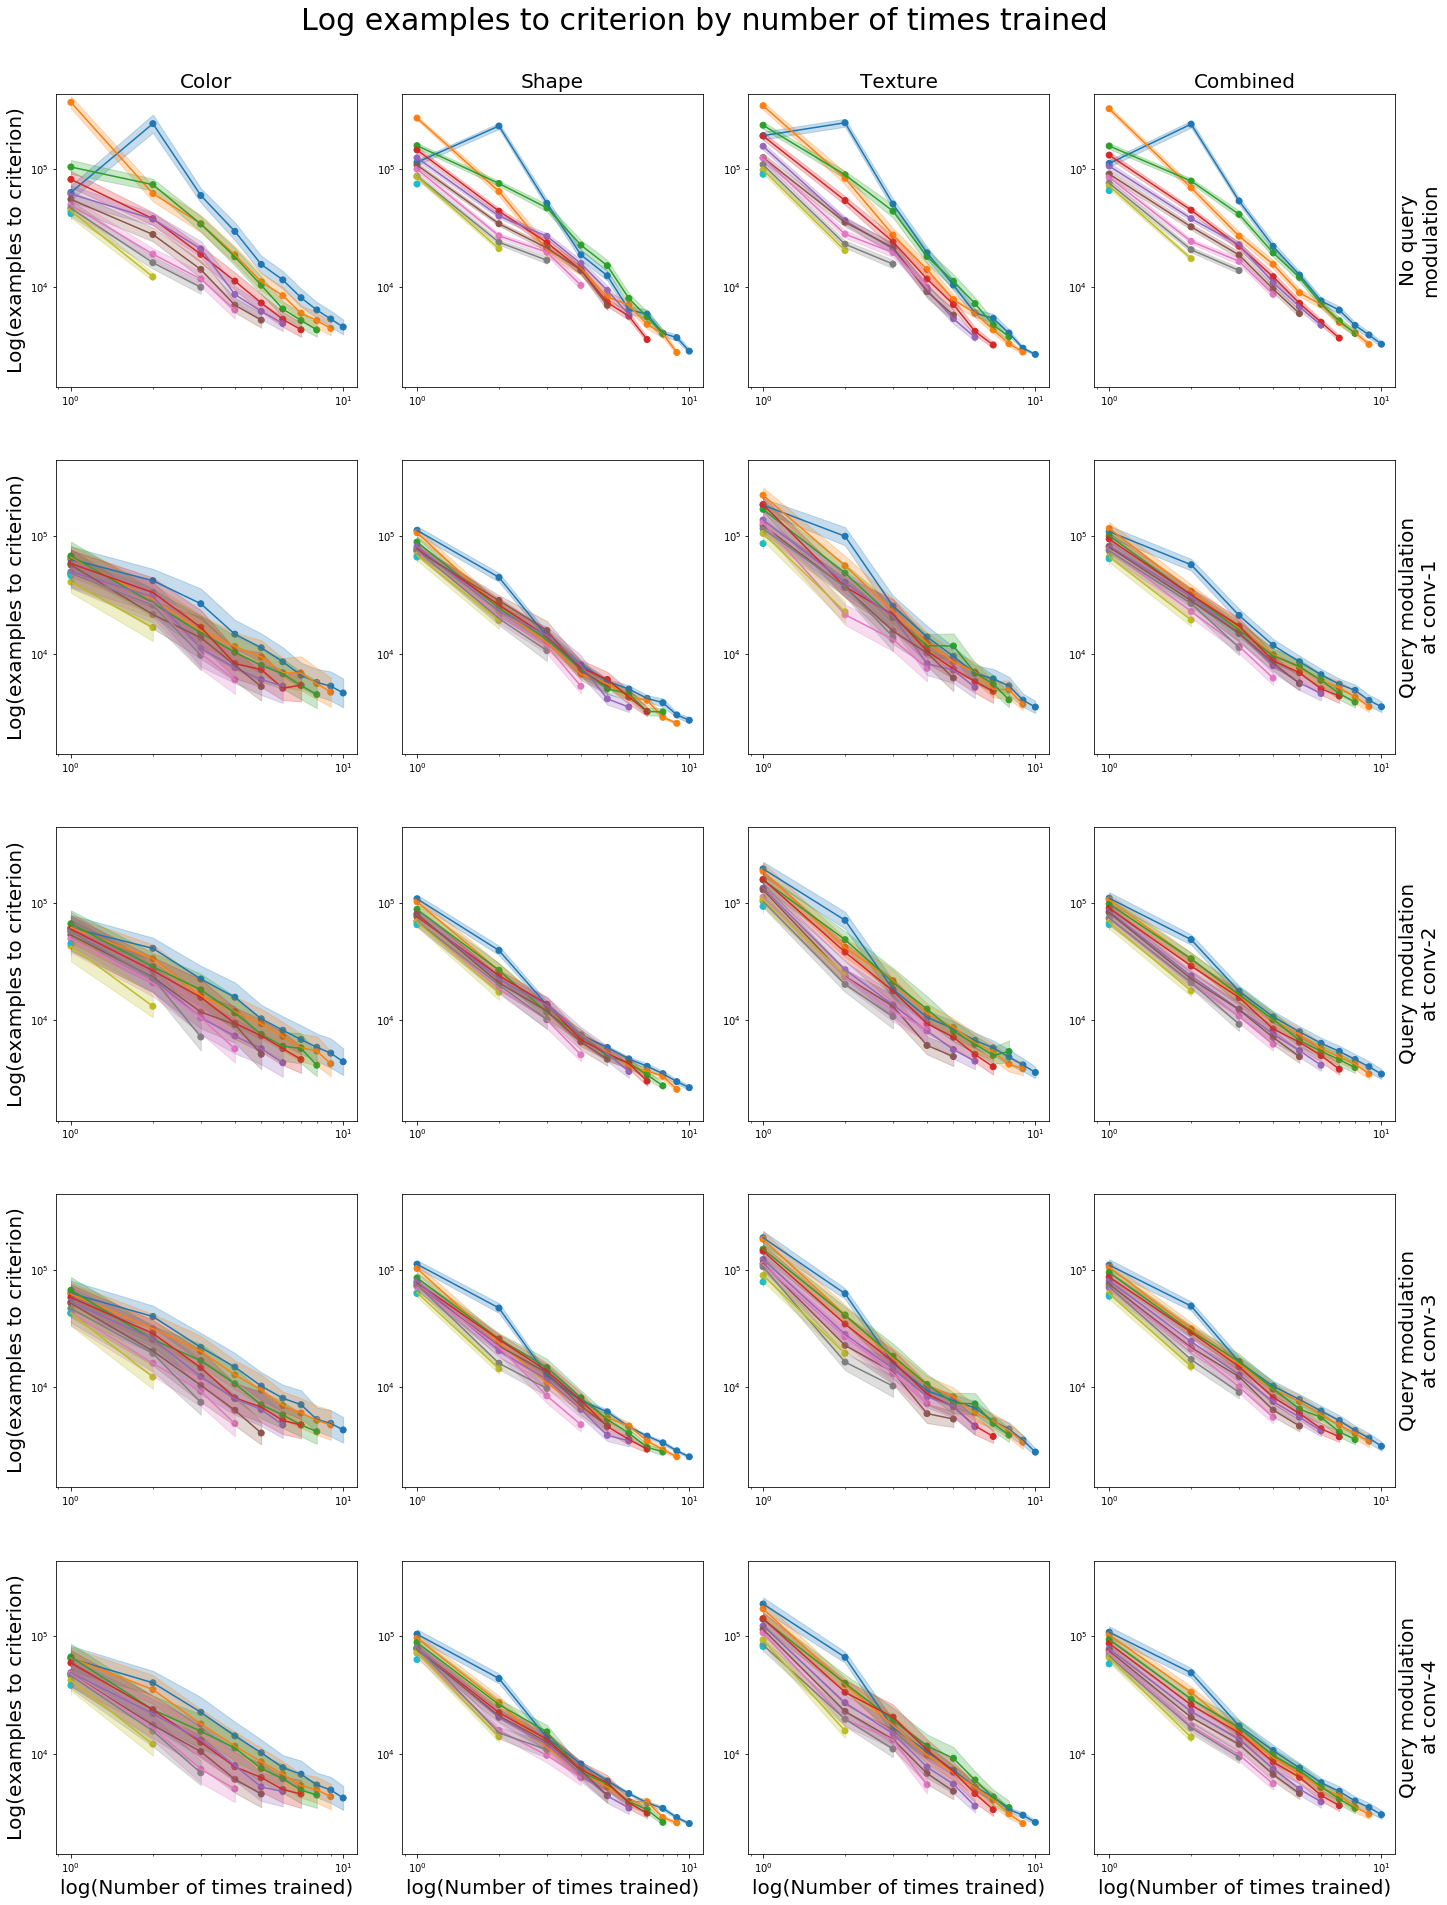

In [140]:
ylim = (7.25, 13)
fonts = dict(fontsize=20)
plots.plot_per_model_per_dimension(six_replications_analyses, query_mod_replications, 
                                   plots.examples_by_times_trained_on, 
                                   'Log examples to criterion by number of times trained',
                                   fonts, ylim=ylim, sem_n=(20, 20, 20, 60), baseline_sem_n=(60, 60, 60, 180))

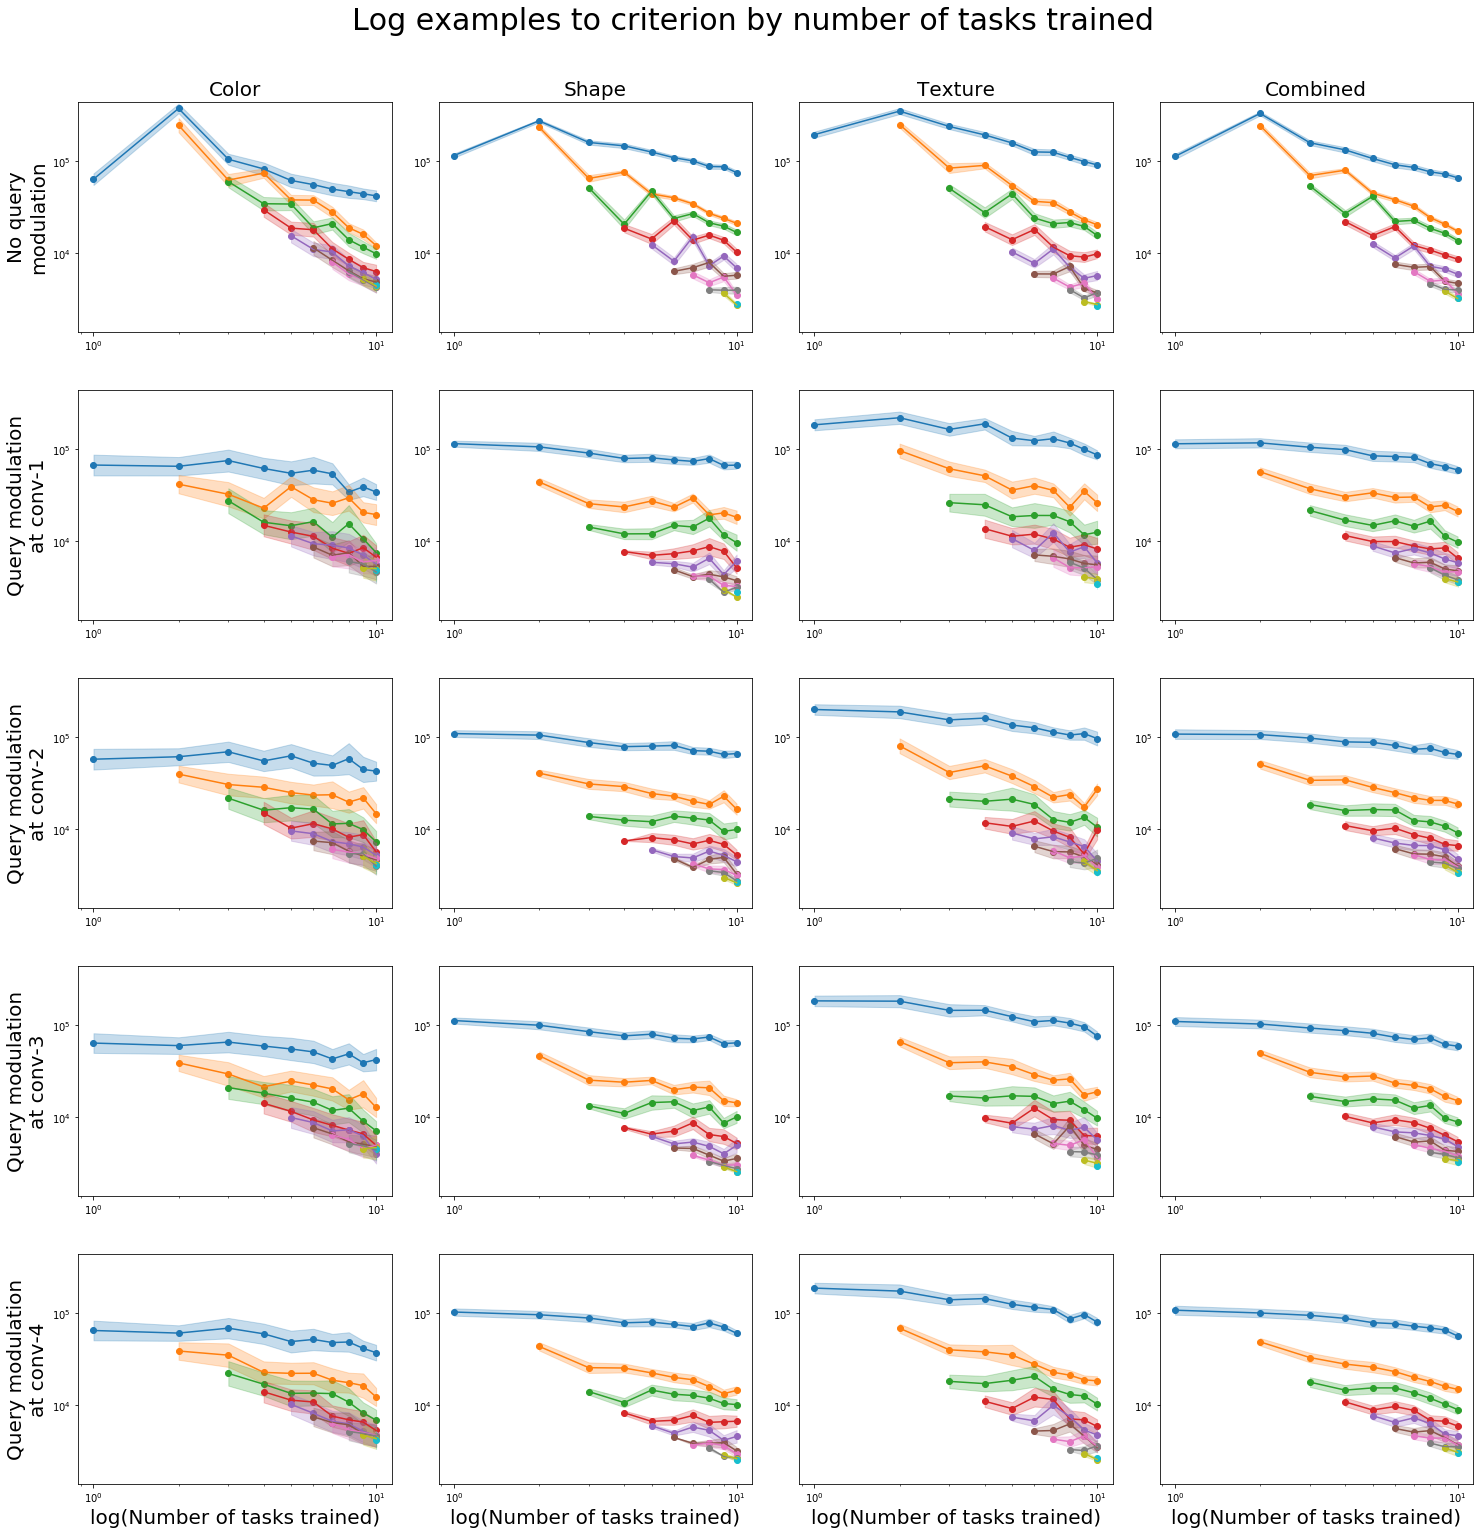

In [50]:
plots.plot_per_model_per_dimension(six_replications_analyses, query_mod_replications, 
                                   plots.examples_by_num_tasks_trained, 
                                   'Log examples to criterion by number of tasks trained',
                                   fonts, ylim=ylim, sem_n=(20, 20, 20, 60), baseline_sem_n=(60, 60, 60, 180))

## Comparison plots - compare all to second replication level

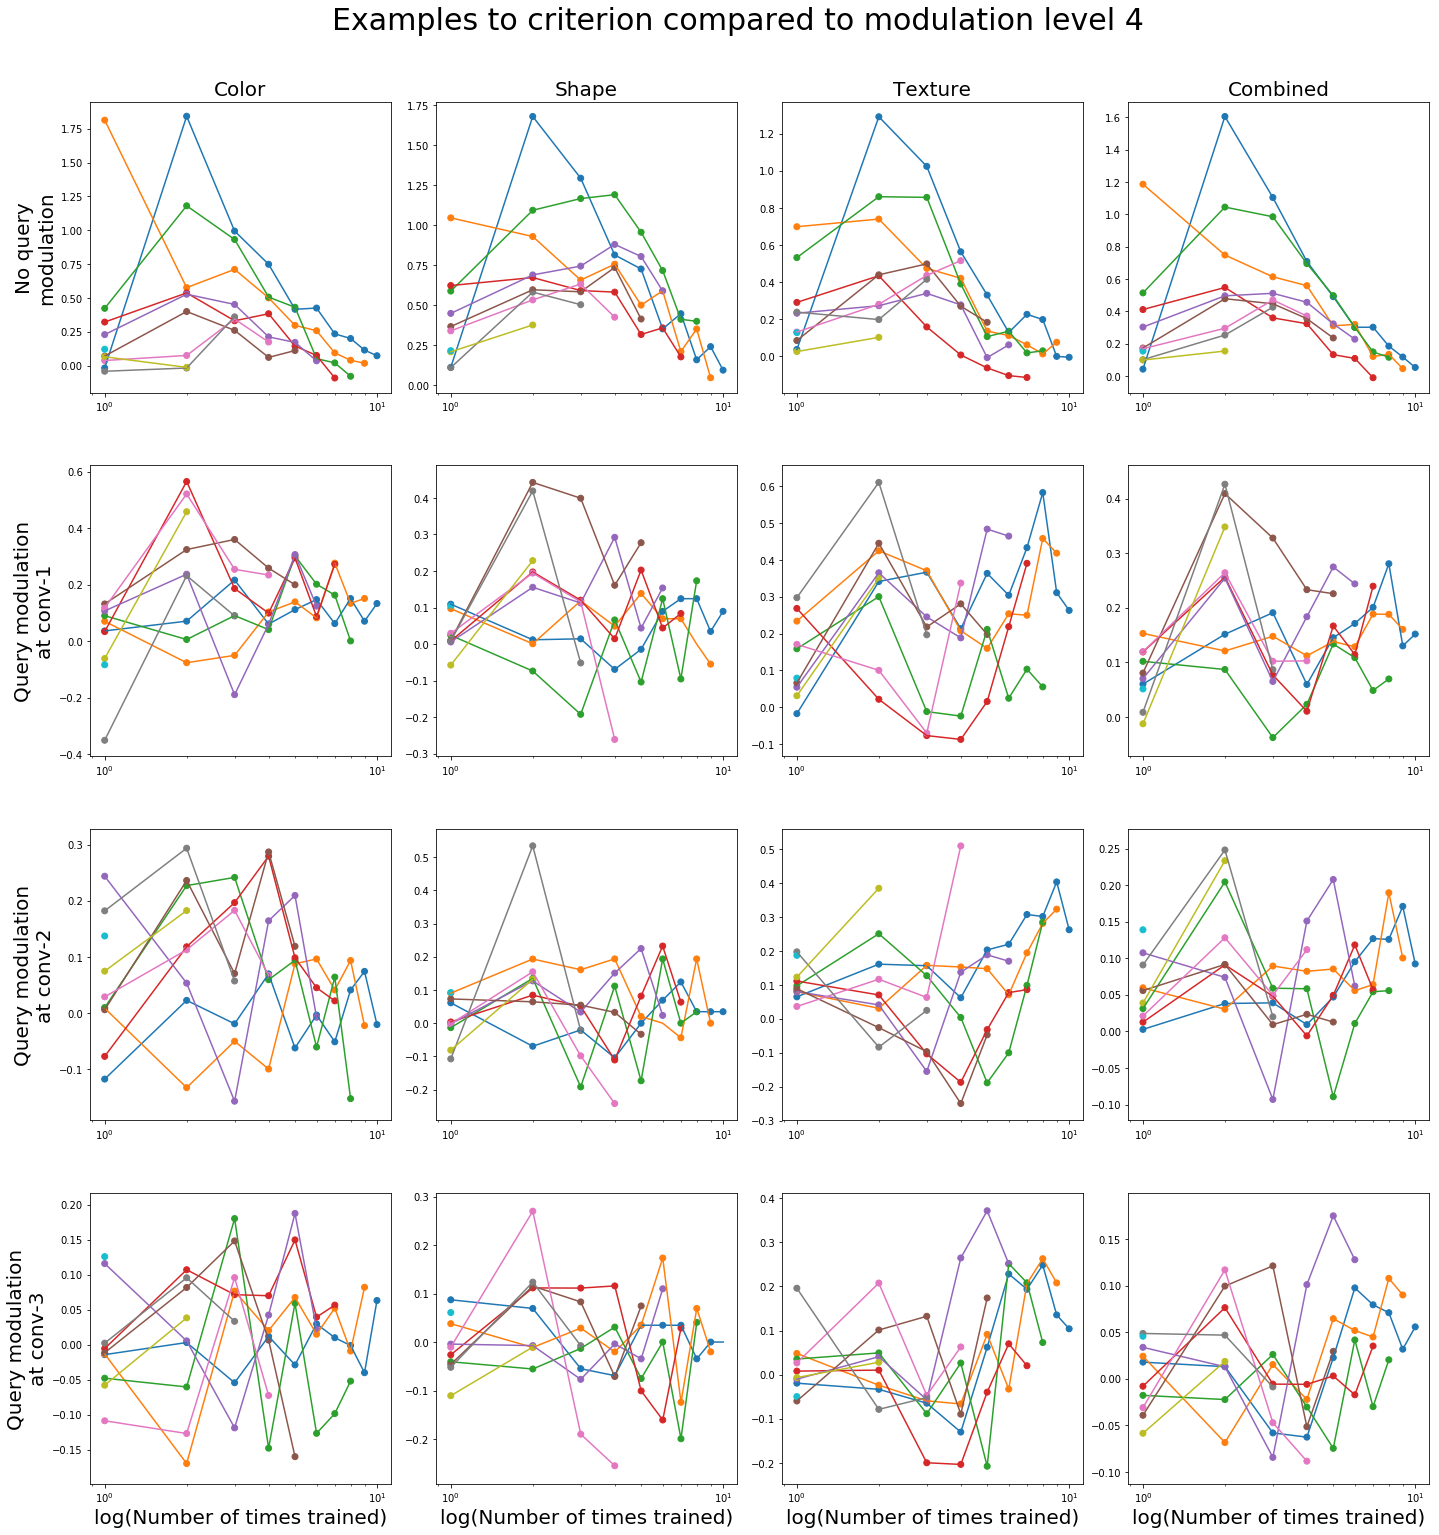

In [90]:
fonts = dict(fontsize=20)

comparison_level = 4

plots.comparison_plot_per_model(six_replications_analyses, query_mod_replications, 
                                plots.examples_by_times_trained_on, 
                                f'Examples to criterion compared to modulation level {comparison_level}',
                                comparison_level, conditions=None, comparison_func=np.subtract, 
                                font_dict=fonts, ylim=None, shade_error=False, data_index=1, log_y=False,
                                sem_n=(20, 20, 20, 60), baseline_sem_n=(60, 60, 60, 180))

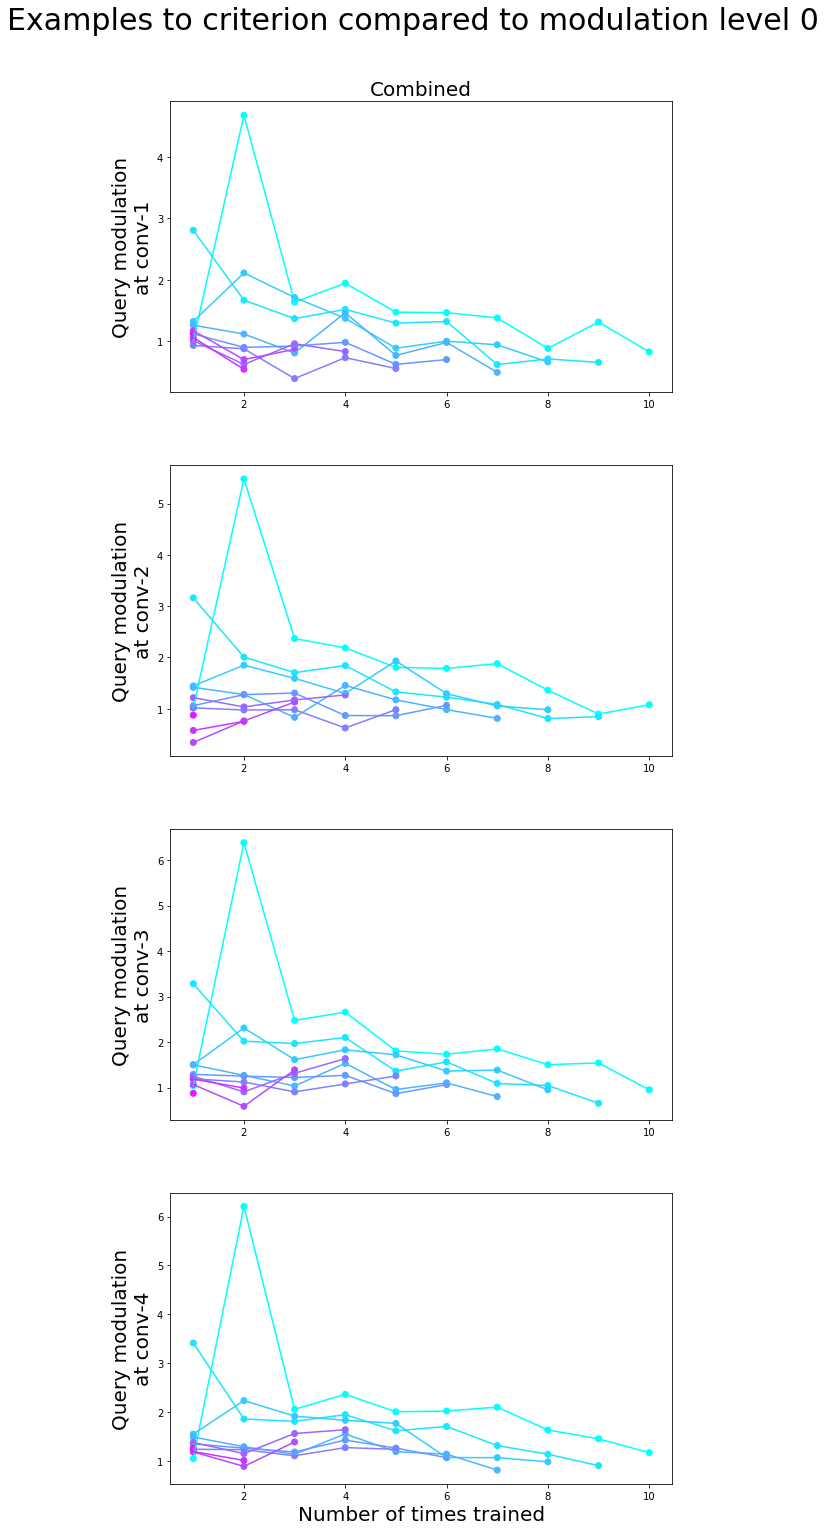

In [115]:
fonts = dict(fontsize=20)

comparison_level = 0

plots.comparison_plot_per_model(six_replications_analyses, query_mod_replications, 
                                plots.examples_by_times_trained_on, 
                                f'Examples to criterion compared to modulation level {comparison_level}',
                                comparison_level, conditions=(3,), comparison_func=np.divide, 
                                font_dict=fonts, ylim=None, shade_error=False, 
                                data_index=0, log_x=False, log_y=False, comparison_first=True,
                                sem_n=(20, 20, 20, 60), baseline_sem_n=(60, 60, 60, 180),
                                colormap='cool')

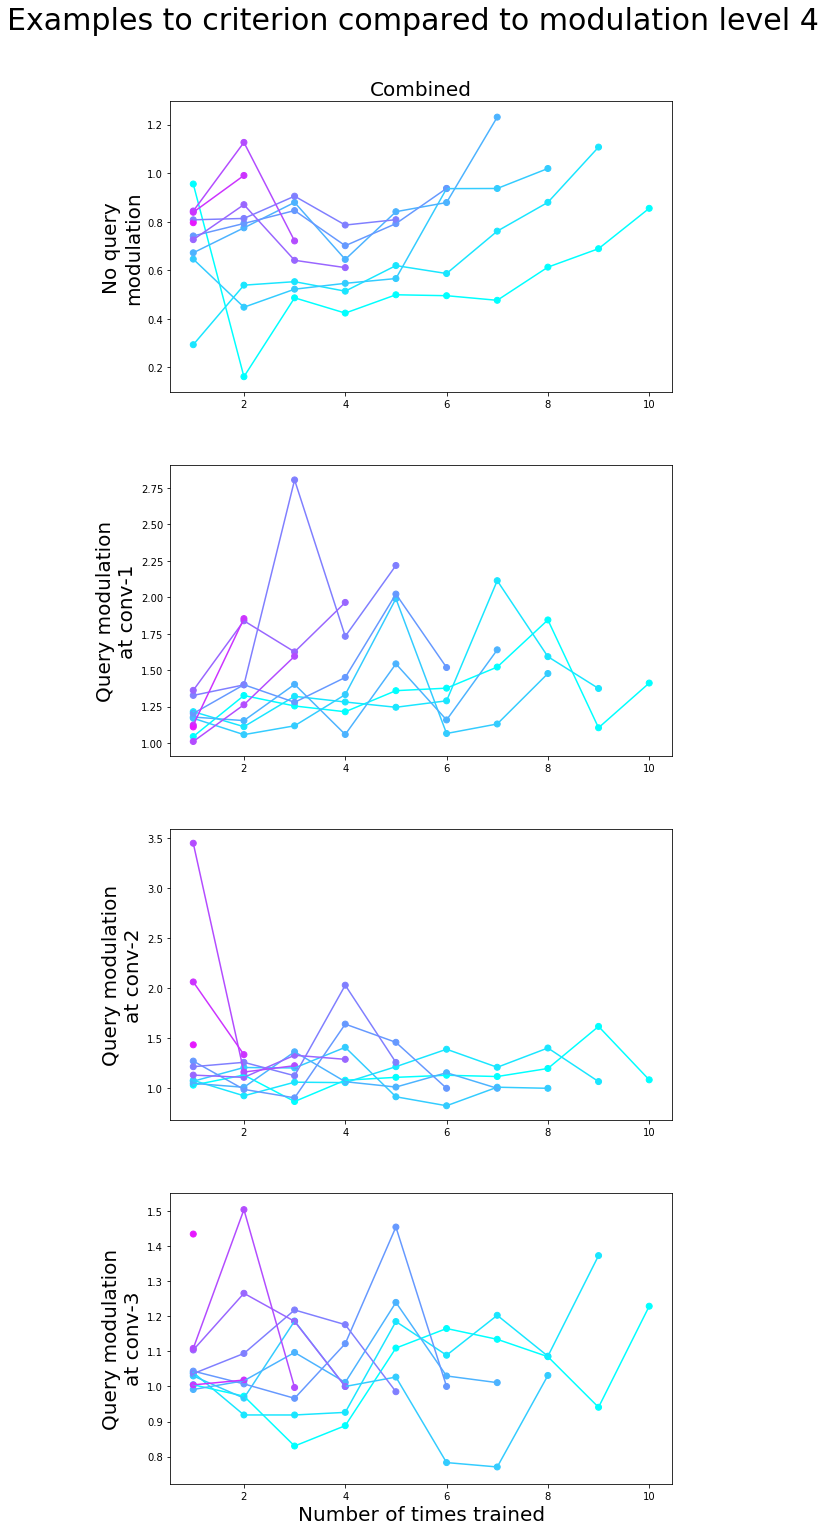

In [116]:
fonts = dict(fontsize=20)

comparison_level = 4

plots.comparison_plot_per_model(six_replications_analyses, query_mod_replications, 
                                plots.examples_by_times_trained_on, 
                                f'Examples to criterion compared to modulation level {comparison_level}',
                                comparison_level, conditions=(3,), comparison_func=np.divide, 
                                font_dict=fonts, ylim=None, shade_error=False, 
                                data_index=0, log_x=False, log_y=False, comparison_first=False,
                                sem_n=(20, 20, 20, 60), baseline_sem_n=(60, 60, 60, 180),
                                colormap='cool')

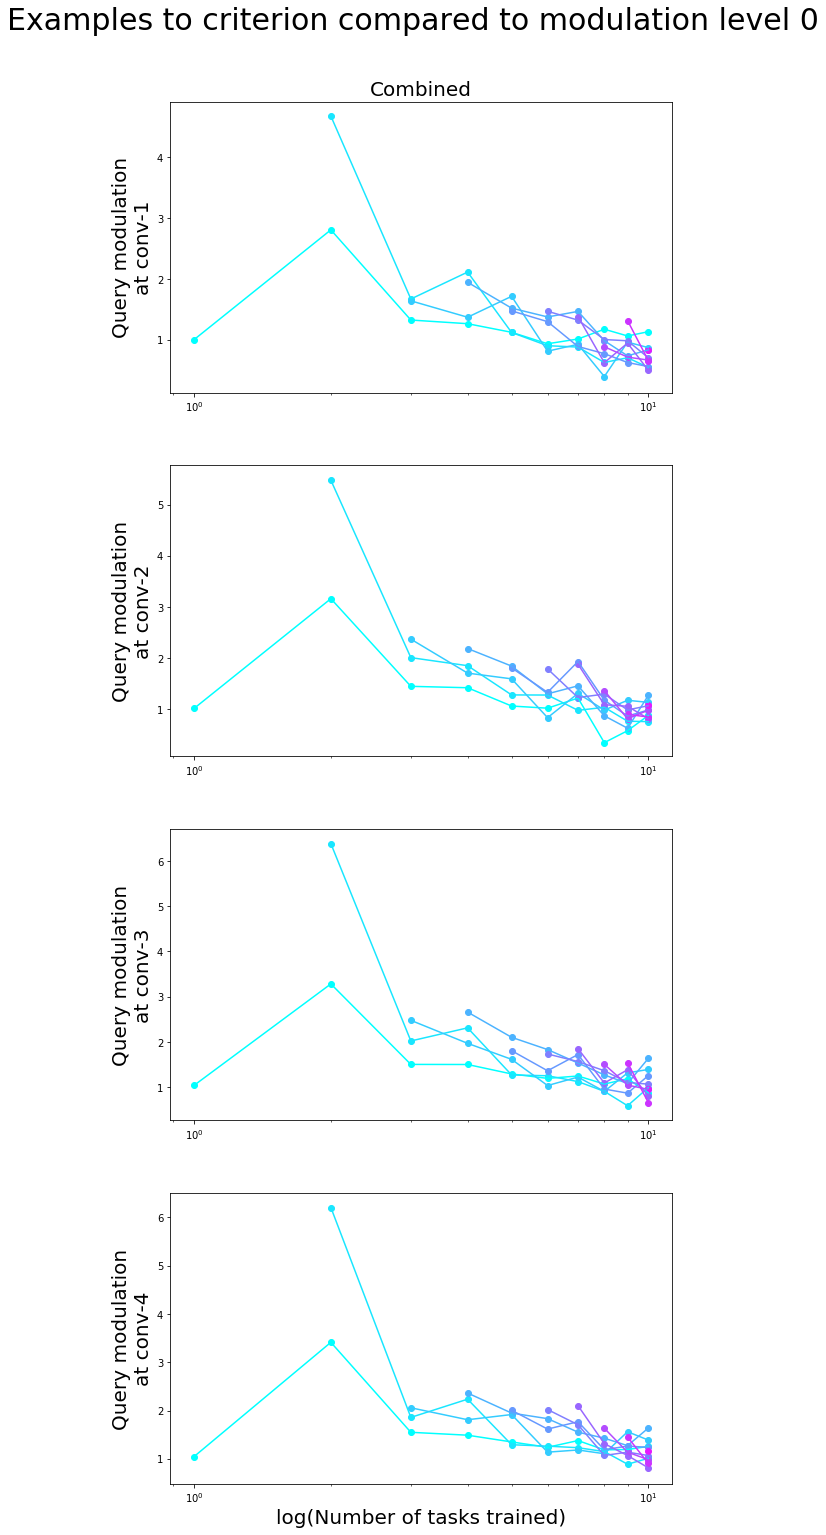

In [112]:
fonts = dict(fontsize=20)

comparison_level = 0

plots.comparison_plot_per_model(six_replications_analyses, query_mod_replications, 
                                plots.examples_by_num_tasks_trained, 
                                f'Examples to criterion compared to modulation level {comparison_level}',
                                comparison_level, conditions=(3,), comparison_func=np.divide, 
                                font_dict=fonts, ylim=None, shade_error=False, 
                                data_index=0, log_y=False, comparison_first=True,
                                sem_n=(20, 20, 20, 60), baseline_sem_n=(60, 60, 60, 180),
                                colormap='cool')

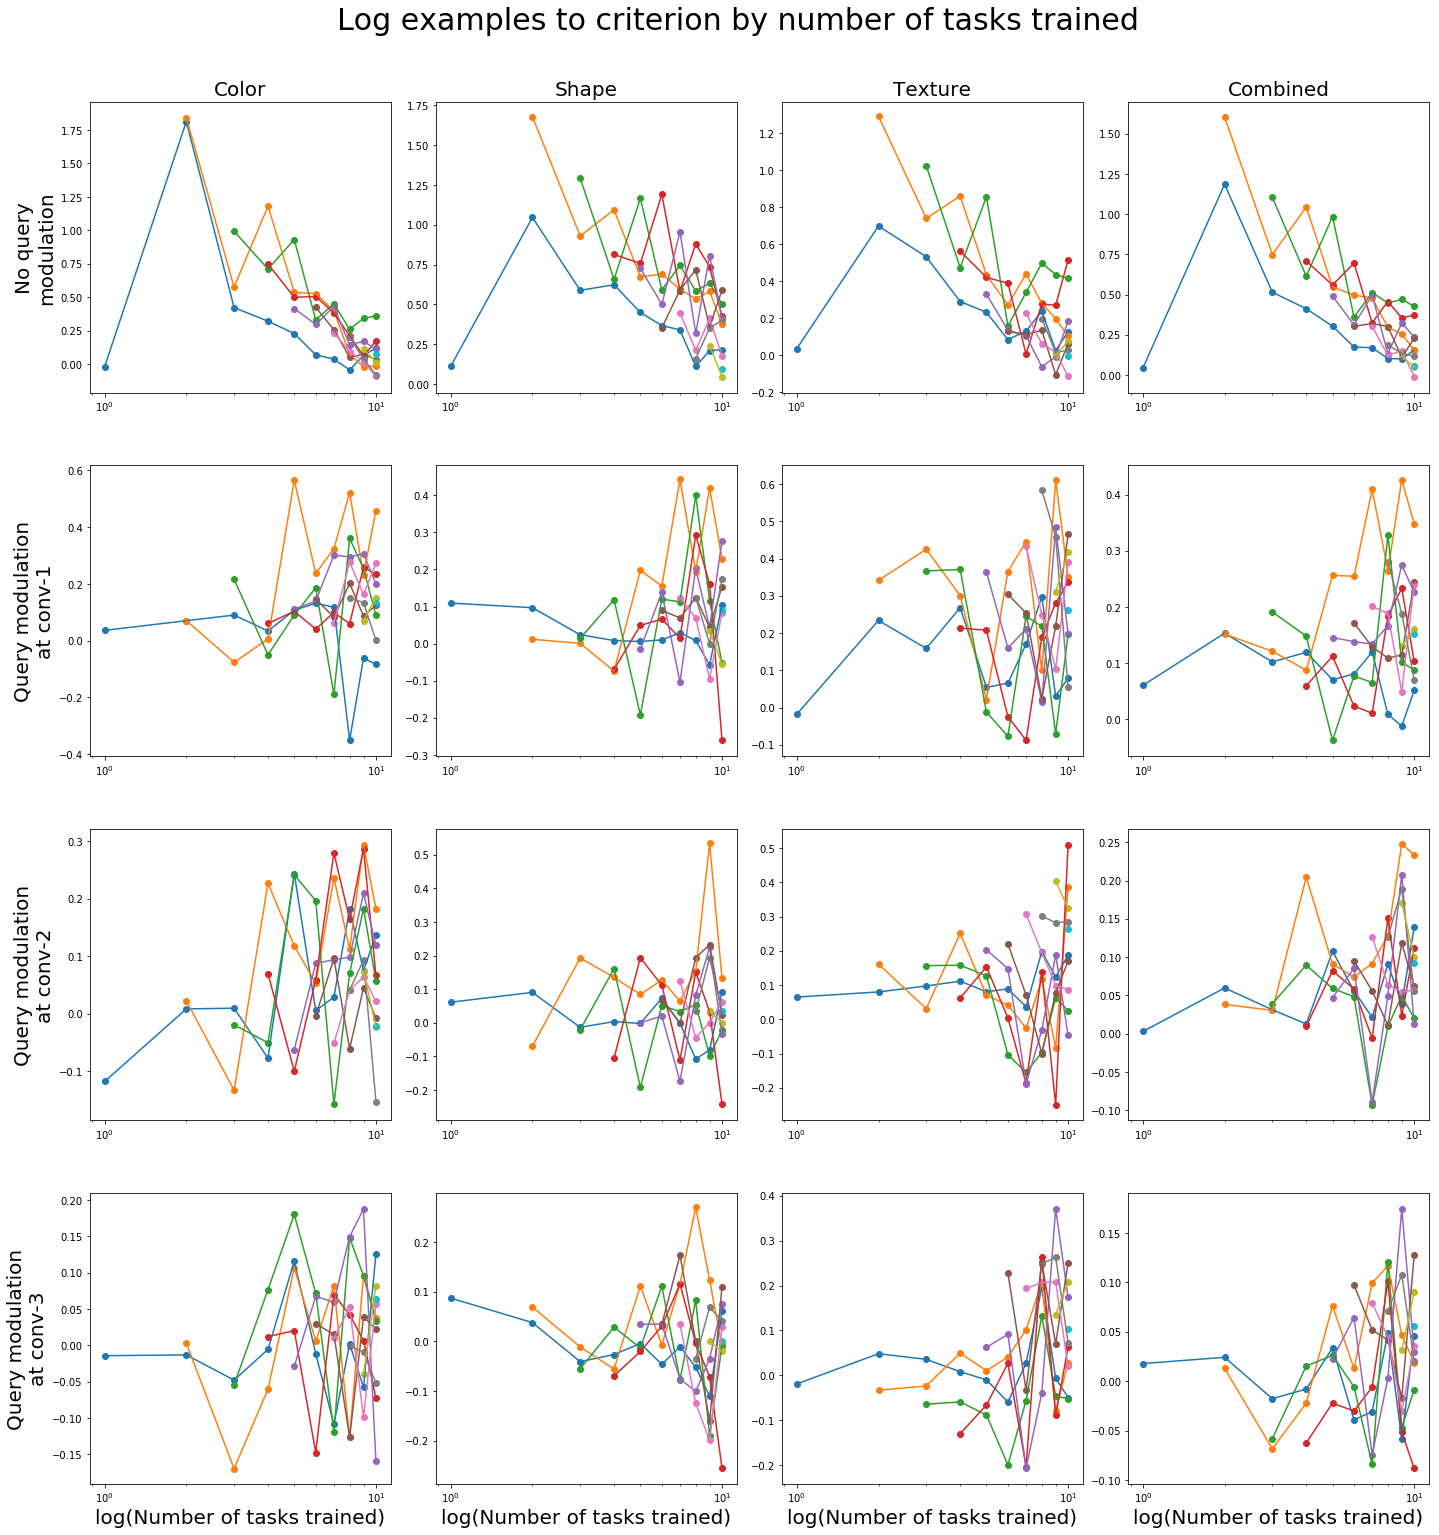

In [89]:
fonts = dict(fontsize=20)

comparison_level = 4

plots.comparison_plot_per_model(six_replications_analyses, query_mod_replications, 
                                plots.examples_by_num_tasks_trained, 
                                'Log examples to criterion by number of tasks trained',
                                comparison_level, conditions=None, comparison_func=np.subtract, 
                                font_dict=fonts, ylim=None, shade_error=False, data_index=1, log_y=False,
                                sem_n=(20, 20, 20, 60), baseline_sem_n=(60, 60, 60, 180))

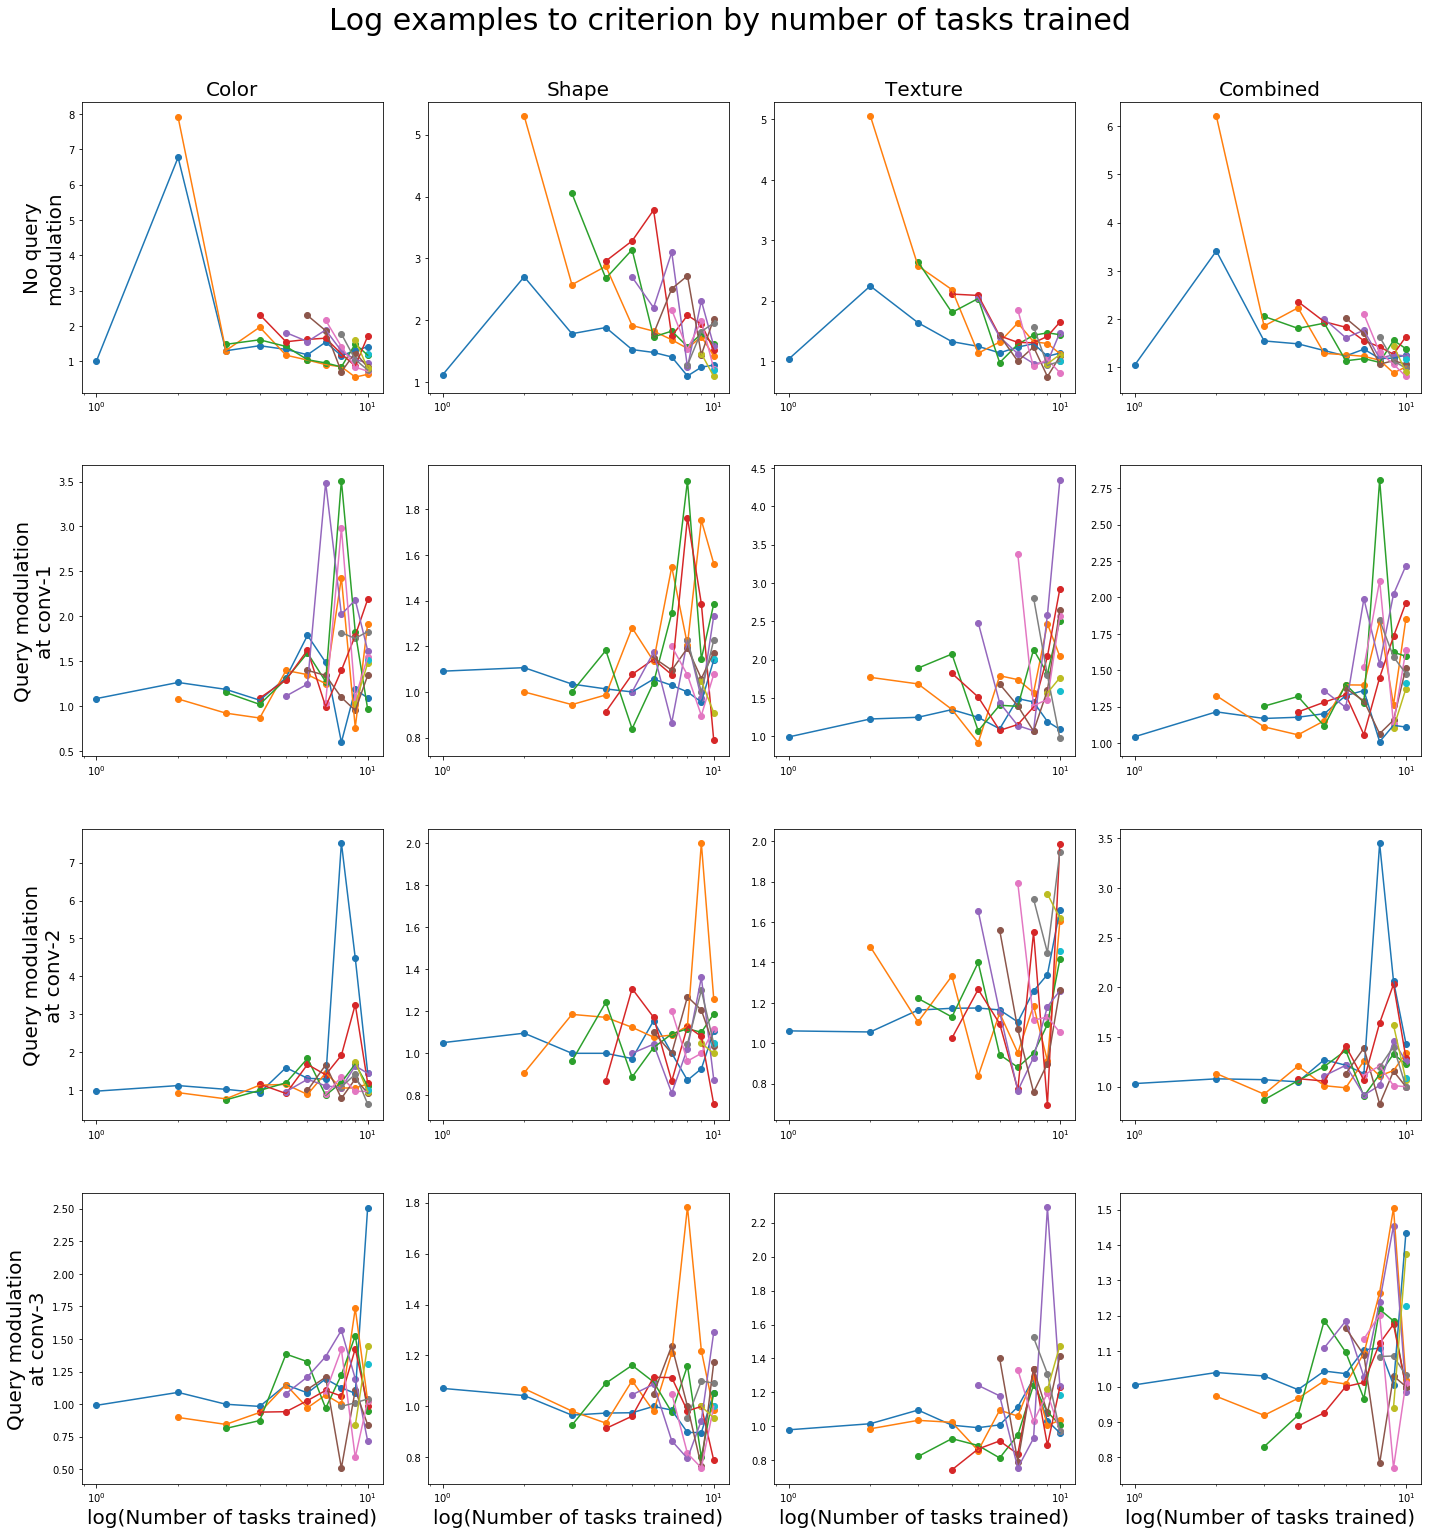

In [88]:
fonts = dict(fontsize=20)

comparison_level = 4

plots.comparison_plot_per_model(six_replications_analyses, query_mod_replications, 
                                plots.examples_by_num_tasks_trained, 
                                'Log examples to criterion by number of tasks trained',
                                comparison_level, conditions=None, comparison_func=np.divide, 
                                font_dict=fonts, ylim=None, shade_error=False, data_index=0, log_y=False,
                                sem_n=(20, 20, 20, 60), baseline_sem_n=(60, 60, 60, 180))

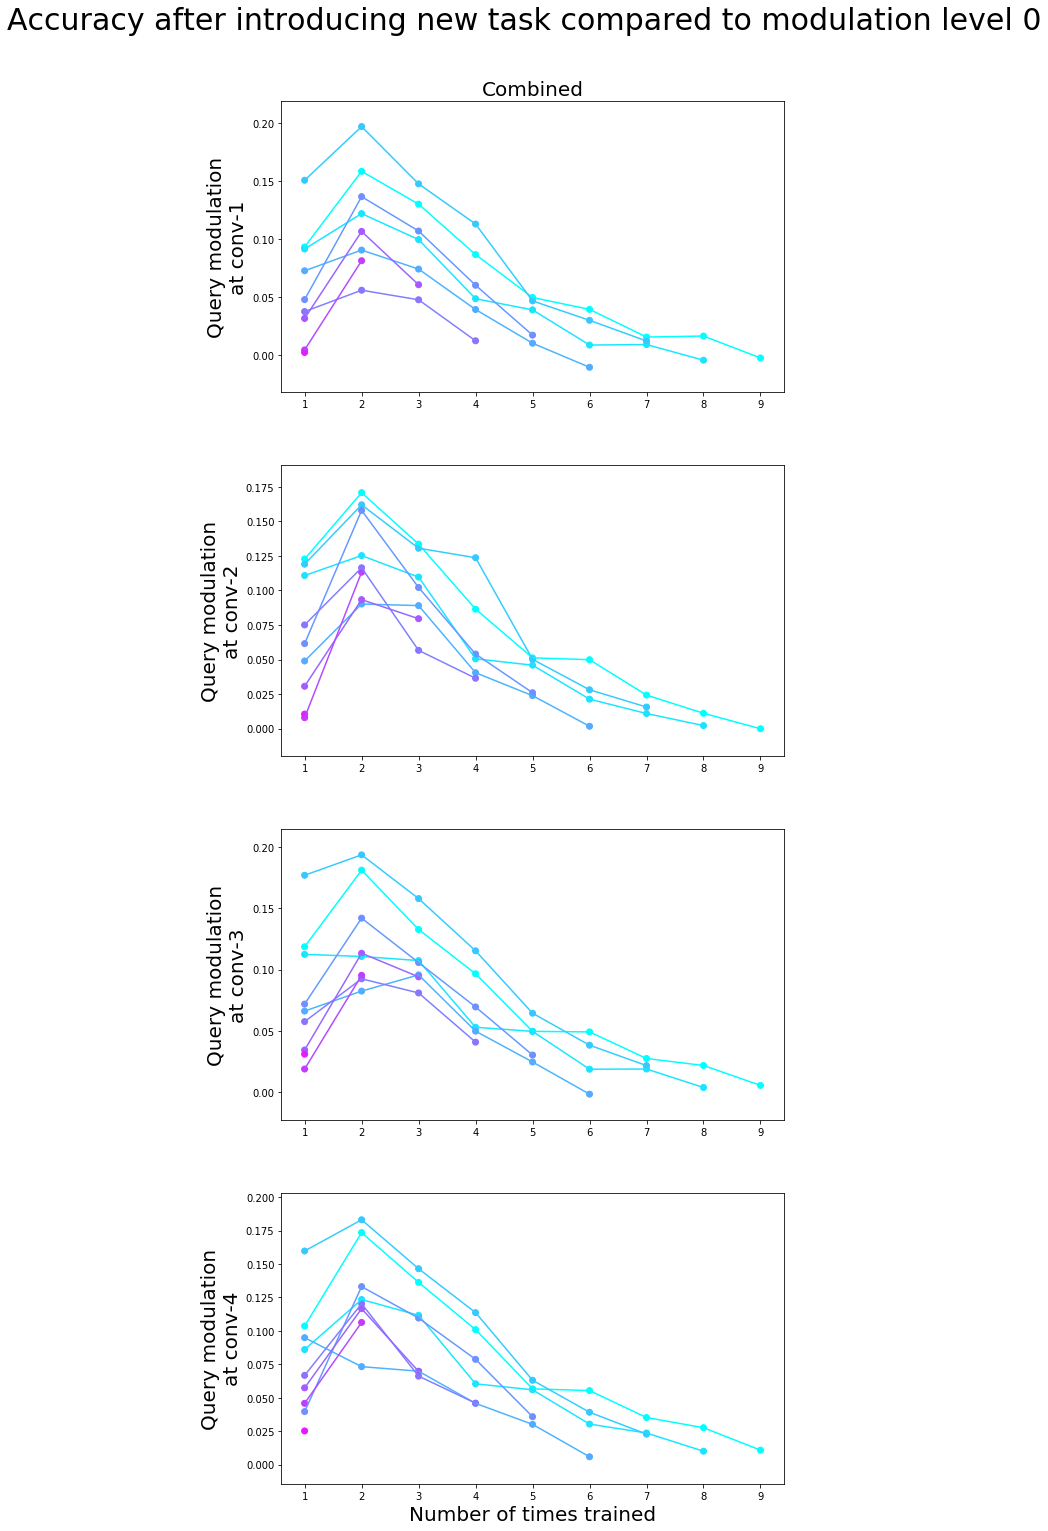

In [123]:
fonts = dict(fontsize=20)

comparison_level = 0

plots.comparison_plot_per_model(six_replications_analyses, query_mod_replications, 
                                plots.examples_by_times_trained_on, 
                                f'Accuracy after introducing new task compared to modulation level {comparison_level}',
                                comparison_level, conditions=(3,), 
                                comparison_func=np.subtract, comparison_first=False,
                                font_dict=fonts, ylim=None, shade_error=False, data_index=2, 
                                log_x=False, log_y=False,
                                sem_n=(20, 20, 20, 60), baseline_sem_n=(60, 60, 60, 180),
                                colormap='cool')

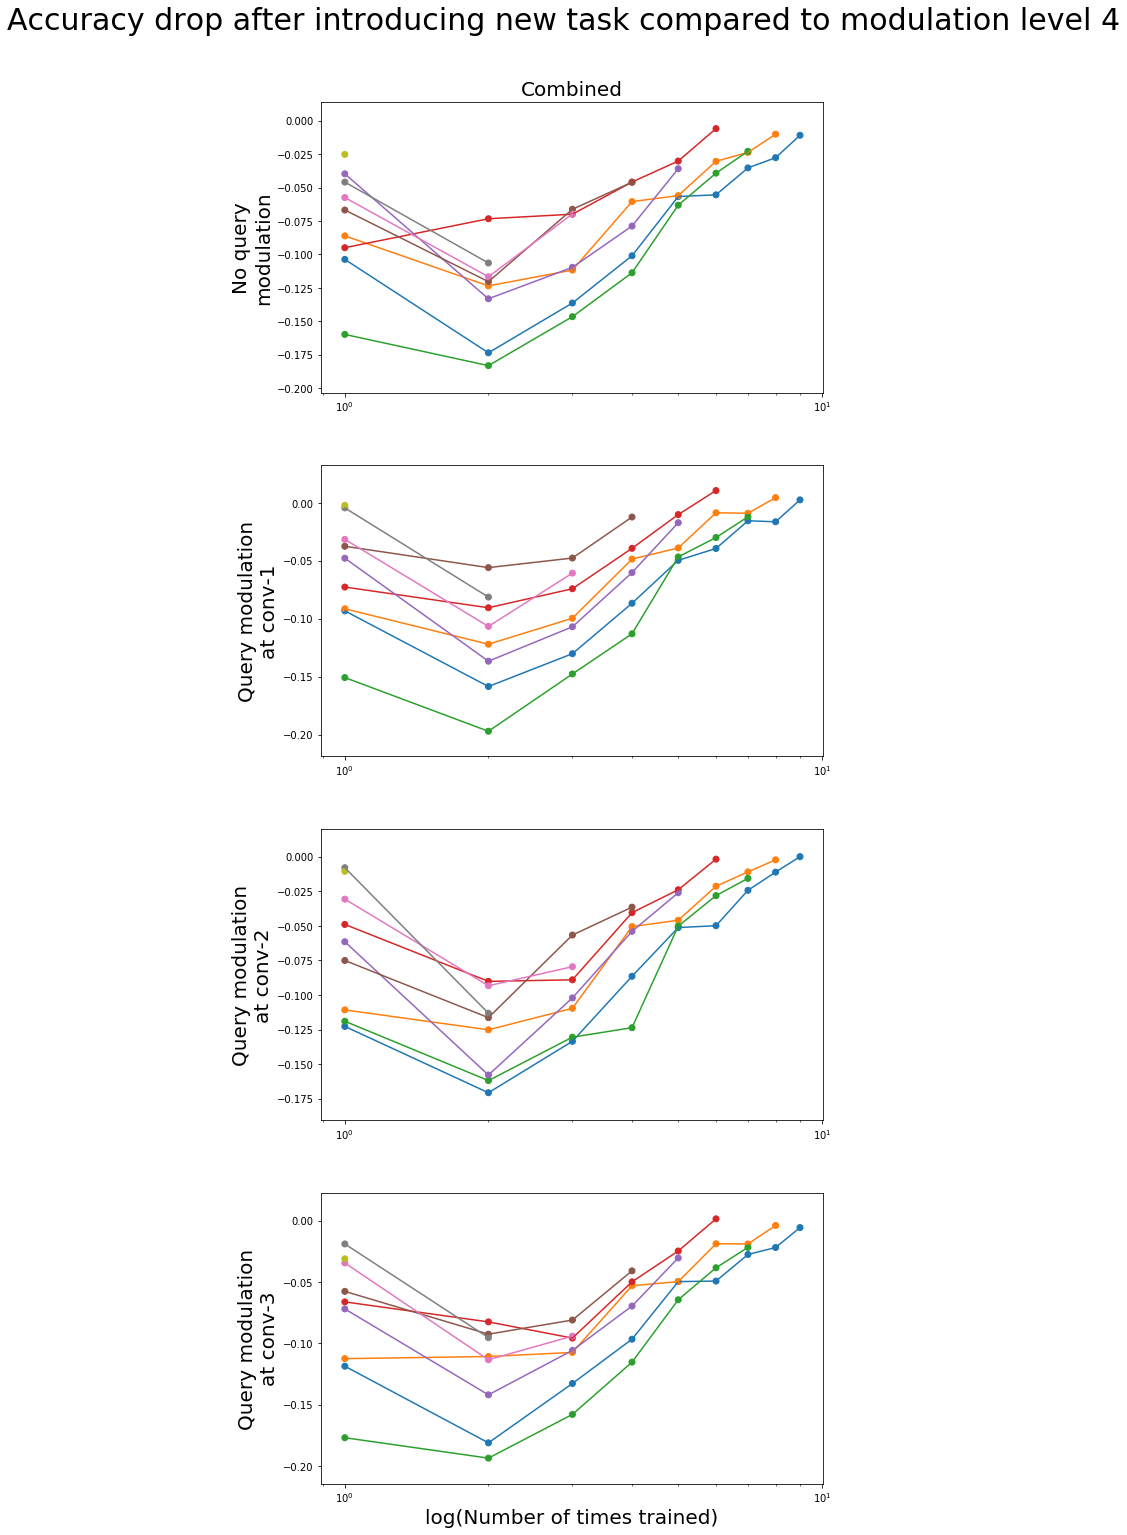

In [98]:
fonts = dict(fontsize=20)

comparison_level = 4

plots.comparison_plot_per_model(six_replications_analyses, query_mod_replications, 
                                plots.examples_by_times_trained_on, 
                                f'Accuracy drop after introducing new task compared to modulation level {comparison_level}',
                                comparison_level, conditions=(3,), comparison_func=np.subtract,
                                font_dict=fonts, ylim=None, shade_error=False, data_index=2, log_y=False,
                                sem_n=(20, 20, 20, 60), baseline_sem_n=(60, 60, 60, 180))

In [130]:
s = '1231'
s.count('1')

2

# Scratch work

## Looking for outlines and analyzing the skewness of these distributions

In [160]:
from scipy.stats import skew, skewtest

In [165]:
output, examples = process_multiple_runs(six_replications_by_dimension_runs[1], debug=True)

In [166]:
ex = np.array(examples)

(array([16.,  0., 19.,  0.,  8.,  0.,  8.,  0.,  3.,  0.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  2.]),
 array([ 2500.,  3750.,  5000.,  6250.,  7500.,  8750., 10000., 11250., 12500., 13750., 15000., 16250., 17500., 18750., 20000., 21250., 22500., 23750., 25000.,
        26250., 27500.]),
 <a list of 20 Patch objects>)

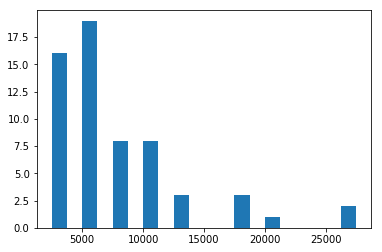

In [167]:
plt.hist(ex[:,5,9], bins=20)

In [168]:
pretty_print_results(skew(ex),  floatfmt=".3f")

╒═══════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═════════╤═══════╕
│   ### │       1 │       2 │       3 │       4 │       5 │       6 │       7 │       8 │       9 │    10 │
╞═══════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═════════╪═══════╡
│     1 │   0.302 │   2.829 │   1.093 │   0.096 │   0.644 │   0.691 │   0.630 │   0.923 │   0.944 │ 0.696 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼───────┤
│     2 │ nan     │   2.132 │   0.702 │   0.479 │   0.269 │   0.982 │   0.603 │   1.018 │   0.689 │ 1.133 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼───────┤
│     3 │ nan     │ nan     │   1.243 │   1.922 │   1.199 │   0.546 │   0.332 │   1.127 │   1.307 │ 1.237 │
├───────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼───────┤
│     4 │ nan     │ nan     

In [169]:
res = skewtest(ex)

/Users/guydavidson/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/guydavidson/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/guydavidson/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [170]:
res.pvalue < 0.001

/Users/guydavidson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


array([[False,  True, False, False, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False, False, False,  True],
       [False, False,  True,  True,  True, False, False,  True,  True,  True],
       [False, False, False,  True,  True,  True, False, False, False, False],
       [False, False, False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True, False],
       [False, False, False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False, False, False,  True]])

## Analyzing the average number of example for each actual query/task

In [207]:
query_difficulty = sum([r[1] for r in six_replications_by_dimension])
query_names = ['blue', 'brown', 'cyan', 'gray', 'green', 'orange', 'pink',
       'purple', 'red', 'yellow', 'cone', 'cube', 'cylinder',
       'dodecahedron', 'ellipsoid', 'octahedron', 'pyramid', 'rectangle',
       'sphere', 'torus', 'chain_mail', 'marble', 'maze', 'metal',
       'metal_weave', 'polka', 'rubber', 'rug', 'tiles', 'wood_plank']
dimension_names = ['color', 'shape', 'texture']

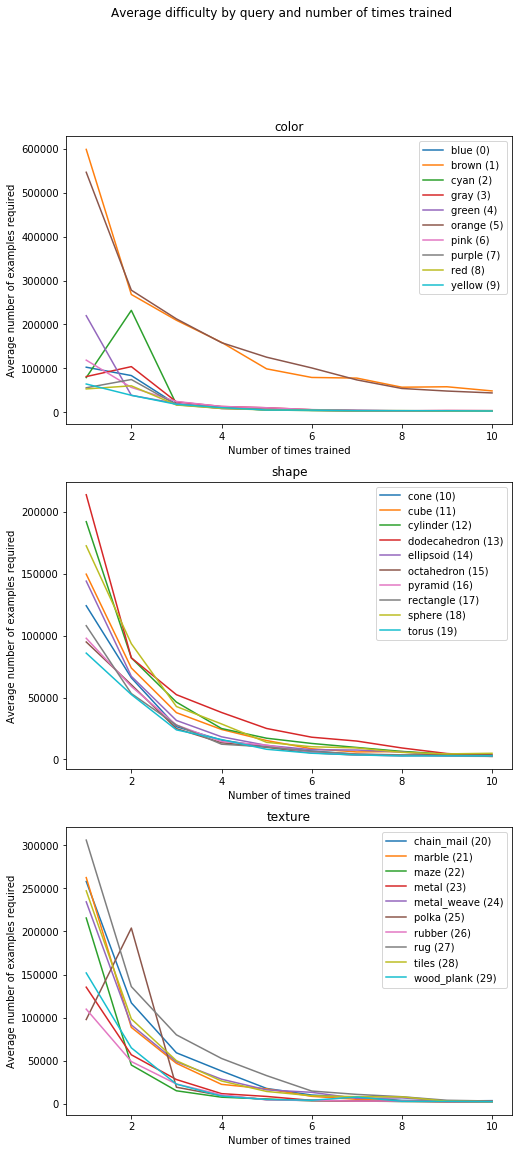

In [269]:
plt.figure(figsize=(8, 18))

plt.suptitle('Average difficulty by query and number of times trained')

for i in range(3):
    ax = plt.subplot(3, 1, i + 1)
    x_values = range(1, 11)
    
    for query_id in range(i * 10, (i + 1) * 10):
        ax.plot(x_values, query_difficulty[query_id,:], label=f'{query_names[query_id]} ({query_id})')
    
    ax.set_title(dimension_names[i])
    ax.set_xlabel('Number of times trained')
    ax.set_ylabel('Average number of examples required')
    ax.legend(loc='best')
    

plt.show()

In [320]:
a = (1, 2, 3)
b = (4, 5, 6)

{c: d for (c, d) in zip(a, b)}

{1: 4, 2: 5, 3: 6}

In [145]:
np.log((4500, 22500, 45000, 90000, 225000, 450000))

array([ 8.41183268, 10.02127059, 10.71441777, 11.40756495, 12.32385568, 13.01700286])

In [156]:
df = six_replications_by_dimension_runs.combined[0].history()

In [166]:
samples = 100
first_task_accuracy_per_epoch = np.zeros((10, samples))
first_task_accuracy_per_epoch_counts = np.zeros((10, samples))
new_task_accuracy_per_epoch = np.zeros((10, samples))
new_task_accuracy_per_epoch_counts = np.zeros((10, samples))

In [157]:
first_task_finished = df['Test Accuracy, Query #2'].first_valid_index() - 1

In [158]:
first_task_finished

23

In [163]:
df[analysis.TASK_ACC_COLS][:first_task_finished + 2]

Test Accuracy, Query #1  Test Accuracy, Query #2  Test Accuracy, Query #3  \
0                       NaN                      NaN                      NaN   
1                    0.7408                      NaN                      NaN   
2                    0.7508                      NaN                      NaN   
3                    0.7610                      NaN                      NaN   
4                    0.7676                      NaN                      NaN   
5                    0.7648                      NaN                      NaN   
6                    0.7820                      NaN                      NaN   
7                    0.7848                      NaN                      NaN   
8                    0.7970                      NaN                      NaN   
9                    0.7898                      NaN                      NaN   
10                   0.7970                      NaN                      NaN   
11                   0.8116                      NaN                      NaN   
12                   0.8244                      NaN                      NaN   
13                   0.8328                      NaN                      NaN   
14                   0.8474                      NaN                      NaN   
15                   0.8480                      NaN                      NaN   
16                   0.8766                      NaN                      NaN   
17                   0.8898                      NaN                      NaN   
18                   0.8840                      NaN                      NaN   
19                   0.9218                      NaN                      NaN   
20                   0.9238                      NaN                      NaN   
21                   0.9472                      NaN                      NaN   
22                   0.9492                      NaN                      NaN   
23                   0.9662                      NaN                      NaN   
24                   0.6292                    0.536                      NaN   

    Test Accuracy, Query #4  Test Accuracy, Query #5  Test Accuracy, Query #6  \
0                       NaN                      NaN                      NaN   
1                       NaN                      NaN                      NaN   
2                       NaN                      NaN                      NaN   
3                       NaN                      NaN                      NaN   
4                       NaN                      NaN                      NaN   
5                       NaN                      NaN                      NaN   
6                       NaN                      NaN                      NaN   
7                       NaN                      NaN                      NaN   
8                       NaN                      NaN                      NaN   
9                       NaN                      NaN                      NaN   
10                      NaN                      NaN                      NaN   
11                      NaN                      NaN                      NaN   
12                      NaN                      NaN                      NaN   
13                      NaN                      NaN                      NaN   
14                      NaN                      NaN                      NaN   
15                      NaN                      NaN                      NaN   
16                      NaN                      NaN                      NaN   
17                      NaN                      NaN                      NaN   
18                      NaN                      NaN                      NaN   
19                      NaN                      NaN                      NaN   
20                      NaN                      NaN                      NaN   
21                      NaN                      NaN                      NaN   
22                      NaN       

In [164]:
df['Test Accuracy, Query #1'][first_task_finished + 1]

0.6292

In [ ]:
first_task_accuracy_per_epoch[0, 0:first_task_finished] += df['Test Accuracy, Query #1'][1:first_task_finished + 1]

In [168]:
first_task_accuracy_per_epoch[0, 0:first_task_finished]

array([0.7408, 0.7508, 0.761 , 0.7676, 0.7648, 0.782 , 0.7848, 0.797 , 0.7898, 0.797 , 0.8116, 0.8244, 0.8328, 0.8474, 0.848 , 0.8766, 0.8898, 0.884 , 0.9218,
       0.9238, 0.9472, 0.9492, 0.9662])

In [173]:
current_task = 2
current_task_start = df[f'Test Accuracy, Query #{current_task}'].first_valid_index()
current_task_end = df[f'Test Accuracy, Query #{current_task + 1}'].first_valid_index()

df[analysis.TASK_ACC_COLS][current_task_start:current_task_end]

Test Accuracy, Query #1  Test Accuracy, Query #2  Test Accuracy, Query #3  \
24                   0.6292                   0.5360                      NaN   
25                   0.6296                   0.7666                      NaN   
26                   0.6284                   0.8208                      NaN   
27                   0.6196                   0.8388                      NaN   
28                   0.6160                   0.8420                      NaN   
29                   0.6698                   0.8100                      NaN   
30                   0.5874                   0.9208                      NaN   
31                   0.7606                   0.8216                      NaN   
32                   0.7924                   0.9040                      NaN   
33                   0.7382                   0.9972                      NaN   
34                   0.7622                   0.9986                      NaN   
35                   0.8236                   0.9992                      NaN   
36                   0.8468                   0.9986                      NaN   
37                   0.8584                   0.9986                      NaN   
38                   0.8602                   0.9984                      NaN   
39                   0.8862                   0.9992                      NaN   
40                   0.8942                   0.9994                      NaN   
41                   0.8916                   0.9994                      NaN   
42                   0.8908                   0.9996                      NaN   
43                   0.9126                   0.9996                      NaN   
44                   0.9152                   0.9992                      NaN   
45                   0.9286                   0.9996                      NaN   
46                   0.9026                   0.9984                      NaN   
47                   0.9414                   0.9996                      NaN   
48                   0.9374                   1.0000                      NaN   
49                   0.9454                   0.9998                      NaN   
50                   0.9468                   1.0000                      NaN   
51                   0.9464                   0.9992                      NaN   
52                   0.9618                   0.9994                      NaN   

    Test Accuracy, Query #4  Test Accuracy, Query #5  Test Accuracy, Query #6  \
24                      NaN                      NaN                      NaN   
25                      NaN                      NaN                      NaN   
26                      NaN                      NaN                      NaN   
27                      NaN                      NaN                      NaN   
28                      NaN                      NaN                      NaN   
29                      NaN                      NaN                      NaN   
30                      NaN                      NaN                      NaN   
31                      NaN                      NaN                      NaN   
32                      NaN                      NaN                      NaN   
33                      NaN                      NaN                      NaN   
34                      NaN                      NaN                      NaN   
35                      NaN                      NaN                      NaN   
36                      NaN                      NaN                      NaN   
37                      NaN                      NaN                      NaN   
38                      NaN                      NaN                      NaN   
39                      NaN                      NaN                      NaN   
40                      NaN                      NaN                      NaN   
41                      NaN                      NaN                      NaN   
42                      NaN       

In [175]:
df['Test Accuracy, Query #1'][current_task_start:current_task_end]

24    0.6292
25    0.6296
26    0.6284
27    0.6196
28    0.6160
29    0.6698
30    0.5874
31    0.7606
32    0.7924
33    0.7382
34    0.7622
35    0.8236
36    0.8468
37    0.8584
38    0.8602
39    0.8862
40    0.8942
41    0.8916
42    0.8908
43    0.9126
44    0.9152
45    0.9286
46    0.9026
47    0.9414
48    0.9374
49    0.9454
50    0.9468
51    0.9464
52    0.9618
Name: Test Accuracy, Query #1, dtype: float64

In [177]:
first_task_accuracy_per_epoch[1, 0:current_task_end - current_task_start] = df['Test Accuracy, Query #1'][current_task_start:current_task_end]

In [26]:
a = np.array(((1, 1, 1, np.nan), (1, 1, 1, np.nan)))
b = np.array(((2, 2, np.nan, np.nan), (2, 2, np.nan, np.nan)))
c = np.array(((3, np.nan, np.nan, np.nan), (3, np.nan, np.nan, np.nan)))

In [186]:
np.nanmean([a, b, c], axis=0)

/Users/guydavidson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


array([[2. , 1.5, 1. , nan],
       [2. , 1.5, 1. , nan]])

In [181]:
np.nanstd((a, b, c), axis=0)

array([0.81649658, 0.5       , 0.        ])

In [ ]:
control_analyses

In [35]:
np.max(np.argmax(np.isnan(k), axis=2))

3

In [17]:
np.isnan([b, c, a])

array([[[False, False,  True,  True],
        [False, False,  True,  True]],

       [[False,  True,  True,  True],
        [False,  True,  True,  True]],

       [[False, False, False,  True],
        [False, False, False,  True]]])

In [31]:
a[:, :3]

array([[1., 1., 1.],
       [1., 1., 1.]])

In [27]:
k = np.array([a, b, c])

In [28]:
k

array([[[ 1.,  1.,  1., nan],
        [ 1.,  1.,  1., nan]],

       [[ 2.,  2., nan, nan],
        [ 2.,  2., nan, nan]],

       [[ 3., nan, nan, nan],
        [ 3., nan, nan, nan]]])

In [31]:
k

array([[[ 1.,  1.,  1., nan],
        [ 1.,  1.,  1., nan]],

       [[ 2.,  2., nan, nan],
        [ 2.,  2., nan, nan]],

       [[ 3., nan, nan, nan],
        [ 3., nan, nan, nan]]])

In [30]:
np.count_nonzero(~np.isnan(k), axis=0)


array([[3, 2, 1, 0],
       [3, 2, 1, 0]])

In [33]:
np.divide(a, np.array([3, 2, 1, 1]))

array([[0.33333333, 0.5       , 1.        ,        nan],
       [0.33333333, 0.5       , 1.        ,        nan]])

In [34]:
hasattr(k, 'shape')

True